## Table of Contents 
* [Notebook Goals & Hypothesis](#1)
* [Data Examination](#2)
* [Initial Cleaning & Wrangling Considerations](#3)
* [Cleaning & Wrangling](#4)
* [Re-Exploration](#5)
* [Final Cleaning & Wrangling](#6)
* [Bootstrap Re-Sampling & Statistic Retrieval](#7)
* [Analysis](#8)
* [Conclusion](#9)



## Notebook Goals & Hypothesis <a class="anchor" id="1"></a>

This notebook aims to refine a specific dataset gathered from my other notebook that scraped job data from Indeed. In this case, the dataset contains the following information for "data analyst" job postings in 20 different search locations:

* position name
* company
* location 
* the average salary for data analysts in that location
* pay type (hourly vs yearly, etc)
* pay range minimum
* pay range maximum
* flag for if the job description contained the word "python"
* flag for if the job description contained the word "tableau"




The analysis I wish to perform through this notebook will aim to determine if there exists a relationship between data analyst job posting starting salaries and mention of the keywords "python" and "tableau" in the posting's job description. Specifically, the null hypothesis the analysis will attempt to reject is:
### $$ H_0: μ_{x1} - μ_{x2} \leq 0$$ 

μ represents the average starting pay, adjusted in relation to each location's average data analyst salary as a proportion, and x represents the groups of Indeed job posts: group 1 where the job description mentions both Python and Tableau (notated as x1), and group 2 where the job description mentions Tableau, but not Python (notated as x2). 

In other words, we will be sampling and measuring for the difference in average starting salaries, proportionate to the location's average data analyst salary, between two groups of jobs posted on Indeed: jobs that mention both Tableau and Python in their job description, and jobs that only mention Tableau in their job description. Hypothesis testing will take place in the analysis phase to apply statistical significance to our decision in rejecting or failing to reject the null hypothesis above. 

The results of this analysis will be used in our organization Odacity's marketing team's decisions on how to promote their Python class to their Tableau class graduates. Although this notebook's main purpose is to address the null hypothesis, we will perform some extra examination on the dataset to give the marketing team a comprehensive conclusion that also includes insights other than an answer to the null.

## Pre-Cleaning Examination <a class="anchor" id="2"></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import random as r
from decimal import Decimal

# Set a seed for randomization; If cells need to be re-run after recording results we need to replicate the same results.
np.random.seed(0)

In [2]:
# Read csv/assign dataframe
df = pd.read_csv('Indeed_Job_Scrape_Raw_02-09-2023_07-18-00.csv')

In [3]:
df.head()

,Job Name,Company,Location,Avg Salary,Pay Type,Pay Min,Pay Max,Mentions python,Mentions tableau
0,Marketing Data Analyst,Lovehoney Group,"austin, tx",89950,unlisted,-1.0,-1.0,0,0
1,Data Analyst,CyberCoders,"austin, tx",89950,yearly,100000.0,130000.0,0,0
2,Data Analyst,RD Thomas Advertising,"austin, tx",-1,unlisted,-1.0,-1.0,0,0
3,Principal IT Business Analyst,NPAworldwide,"austin, tx",89950,unlisted,-1.0,-1.0,0,0
4,Analyst Costing,LSG Sky Chefs,"austin, tx",-1,yearly,50198.0,62376.0,0,0


In [4]:
df.sample(15)

,Job Name,Company,Location,Avg Salary,Pay Type,Pay Min,Pay Max,Mentions python,Mentions tableau
5788,Sr. Business Analyst,WackPro,"san francisco, ca",92514,unlisted,-1.00,-1.0,0,0
5753,Sr. Business Operations Analyst,Lyft,"san francisco, ca",97844,unlisted,-1.00,-1.0,0,0
3460,100% Remote - People Analytics Specialist,"AMS Staffing, Inc.","huntsville, al",-1,yearly,115000.00,140000.0,0,1
4685,Lead Child Welfare Business Intelligence Analyst,State of North Carolina,"raleigh, nc",93366,unlisted,-1.00,-1.0,0,1
10170,Healthcare Data Analyst,Mount Sinai South Nassau Hospital,"new york, ny",98991,unlisted,-1.00,-1.0,0,1
6236,"Business Analyst, Contact Center Technologies",LoanCare,"seattle, wa",-1,unlisted,-1.00,-1.0,0,0
6423,Data Analyst - Senior,Global Dimensions,"seattle, wa",54601,unlisted,-1.00,-1.0,1,0
4755,Data Operations Analyst,ENEL,"raleigh, nc",-1,unlisted,-1.00,-1.0,1,0
1984,"Coordinator II, Board Certified Behavior Analy...",Dallas Independent School District,"dallas, tx",77769,yearly,76031.00,76031.0,0,0
3161,"Business Analyst, Contact Center Technologies",LoanCare,"huntsville, al",-1,unlisted,-1.00,-1.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14871 entries, 0 to 14870
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Name          14871 non-null  object 
 1   Company           14871 non-null  object 
 2   Location          14871 non-null  object 
 3   Avg Salary        14871 non-null  int64  
 4   Pay Type          14871 non-null  object 
 5   Pay Min           14871 non-null  float64
 6   Pay Max           14871 non-null  float64
 7   Mentions python   14871 non-null  int64  
 8   Mentions tableau  14871 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


In [6]:
sum(df.duplicated())

7694

In [7]:
df.describe()

,Avg Salary,Pay Min,Pay Max,Mentions python,Mentions tableau
count,14871.000000,14871.000000,14871.000000,14871.000000,14871.000000
mean,70763.904848,16086.176972,21699.686072,0.183512,0.201062
std,31435.847626,33455.223419,45468.487481,0.387098,0.400808
min,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,63303.000000,-1.000000,-1.000000,0.000000,0.000000
50%,79116.000000,-1.000000,-1.000000,0.000000,0.000000
75%,90255.000000,41.540000,52.140000,0.000000,0.000000
max,159058.000000,200000.000000,296000.000000,1.000000,1.000000


## Cleaning & Wrangling Considerations <a class="anchor" id="3"></a>

There are a couple obvious aspects of the dataset to clean immediately:
* Duplicate rows
* Rows with missing salaries
* Rows that lack mention of Tableau
* Rows with missing location average salaries

Afterwards, a few alterations to make analysis easier:
* re-format columns for consistency and ease of reference
* re-calculate pay so that all pay is in the form of yearly salary
* use each location's average salary to form new columns, calculating the job posting's salary range in relation to the job location's average salary as a percentage of the latter.

## Cleaning & Wrangling <a class="anchor" id="4"></a>

In [8]:
# Duplicates should be removed to ensure cleanliness
# When dropping, location is excluded because cities in close proximity (notably in CA) have duplicate postings
#that won't be caught by drop_duplicates() because the search location was different
pre_length = len(df)
df = df.drop_duplicates(subset = df.columns.difference(['Location'])) 
post_length = len(df)
print(f'{pre_length - post_length} duplicate rows were removed. \n\
New DataFrame length: {post_length} rows')

8836 duplicate rows were removed. 
New DataFrame length: 6035 rows


In [9]:
# Salaries are critical to our analysis, so rows without salaries and location averages should be dropped.
pre_length = len(df)
df = df[(df['Pay Min'] > 0) & (df['Avg Salary'] > 0)]
post_length = len(df)
print(f'{pre_length - post_length} job postings without salaries or location averages were removed. \n\
New DataFrame length: {post_length} rows')

3763 job postings without salaries or location averages were removed. 
New DataFrame length: 2272 rows


In [10]:
# Our analysis is based off the comparison of jobs containing both Python and Tableau to those just containing Tableau, 
# which means that rows/job postings lacking mention of Tableau will not be used in the analysis
pre_length = len(df)
df = df[df['Mentions tableau'] == 1]
post_length = len(df)
print(f'{pre_length - post_length} jobs lacking mention of Tableau were removed. \n\
New DataFrame length: {post_length} rows')

1754 jobs lacking mention of Tableau were removed. 
New DataFrame length: 518 rows


In [11]:
# For consistency and ease of reference, all columns will be made lowercase with excess words removed or changed for ease of access
columns = ['name','company','searched_city','location_avg','pay_freq','min','max','python','tableau']
df.columns = columns

In [12]:
# To make comparisons between jobs easier, all job pay offerings should be formatted as yearly salaries
# Check which types of pay frequencies will need adjusting
print(df['pay_freq'].unique())

['yearly' 'hourly' 'monthly']


In [13]:
# Rows with hourly pay will need their pay columns multiplied by 2080 (40 hrs * 52 weeks)
df.loc[df['pay_freq'] == 'hourly', ['min']] = (df['min'] * 2080)
df.loc[df['pay_freq'] == 'hourly', ['max']] = (df['max'] * 2080)

# Rows with monthly pay will need their pay columns multiplied by 12
df.loc[df['pay_freq'] == 'monthly', ['min']] = (df['min'] * 12)
df.loc[df['pay_freq'] == 'monthly', ['max']] = (df['max'] * 12)

# All salaries are yearly, so we no longer need the pay_freq column
df = df.drop('pay_freq', axis = 1)

In [14]:
# Average salaries may give some context as to why some job postings seem to pay way better than others.
# Create new columns that calculate, proportionally, how good the salary is in comparison
#to the job location's average data analyst salary.
df['min_prop'] = (df['min']/df['location_avg'])
df['max_prop'] = (df['max']/df['location_avg'])

## Exploration before final wrangling <a class="anchor" id="5"></a>

Now that the main and obvious issues with the raw data have been dealt with, we can re-examine the DataFrame for new things to clean and wrangle.

In [15]:
len(df)

518

In [16]:
df.sample(30)

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
865,Research Analyst for State and Local Governanc...,Stanford University,"san jose, ca",91199,64000.0,85000.0,1,1,0.701762,0.932028
9751,Data Analyst,"VIZIO, Inc.","new york, ny",80868,64000.0,64000.0,0,1,0.791413,0.791413
6693,Sr. Data Analyst - Direct Hire - Northern Virg...,Vaco,washington dc,82479,110000.0,120000.0,1,1,1.333673,1.454916
1607,ILS Data Analyst,Health & Human Services Comm,"dallas, tx",77769,59004.0,96720.0,0,1,0.758708,1.243683
10991,Lead Analyst- Finance Data Engineering – SAP FICO,Eaton,"los angeles, ca",84209,87200.0,119900.0,1,1,1.035519,1.423838
790,"Actuarial Analyst, Associate (Hybrid)",Blue Shield of California,"san jose, ca",87223,66000.0,92400.0,0,1,0.756681,1.059354
8229,Evaluation and Data Analyst,US Center for SafeSport,"boulder, co",71181,57000.0,75000.0,0,1,0.800775,1.053652
10601,"Senior Data Analyst, Finance Reporting",Circle,"los angeles, ca",63679,125000.0,165000.0,0,1,1.962971,2.591121
10489,Junior Data Analyst,Los Angeles Apparel,"los angeles, ca",63679,33280.0,33280.0,0,1,0.522621,0.522621
5973,Data Analyst,Moodys Northwest consulting,"seattle, wa",79916,61082.0,114516.0,0,1,0.764328,1.432955


We see in the job names that there's some variance in experience levels expected, such as "senior," "II," etc. Our marketing team's advertisements are targeted towards individuals working towards building new skills to switch careers, meaning that jobs intended for non-entry applicants may not only be irrelevant to the target market Odacity is trying to promote the Python class to, but also skew the salaries (assuming that these position pay more than the entry-level roles). We will revisit this later at the end of this section to determine how we will handle these rows in the final wrangling section. 

Next, we'll take a closer look at the distribution of our salaries.  Obscenely high or low salaries may be inaccurate, and we'll need to make a judgment call on whether or not to keep these outliers. We may have scraped maximum salaries from the salary ranges posted for each data analyst position, but we will be focusing on minimum salaries from here on out to reflect the null hypothesis' focus on average minimum salaries.

In [17]:
df.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,518.000000,518.000000,518.000000,518.000000,518.0,518.000000,518.000000
mean,80832.586873,82110.962548,111241.490347,0.442085,1.0,1.037148,1.401493
std,14770.990091,26767.057898,37050.954514,0.497115,0.0,0.341290,0.461818
min,38309.000000,20000.000000,20000.000000,0.000000,1.0,0.198908,0.198908
25%,72472.000000,64000.000000,85000.000000,0.000000,1.0,0.791947,1.076214
50%,80868.000000,75552.000000,105179.000000,0.000000,1.0,0.992894,1.322433
75%,89950.000000,95120.000000,130000.000000,1.000000,1.0,1.218332,1.681059
max,130328.000000,208000.000000,296000.000000,1.000000,1.0,2.407129,3.091458


The mean for location_avg, min, and to a lesser extent, min_prop, are all closer to the third quartile than the first, suggesting that most outliers are probably on the high-end rather than the low-end of the distribution. We'll verify this with boxplots below:

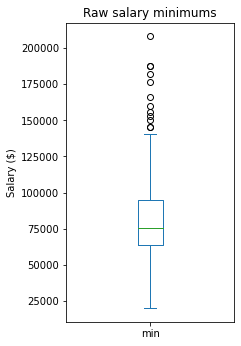

In [18]:
# Plot out the raw salary minimums and maximums
boxplot_raw = df['min'].plot(kind = 'box', title = 'Raw salary minimums', figsize = (3,5.5))
boxplot_raw.set_ylabel('Salary ($)')
plt.show()

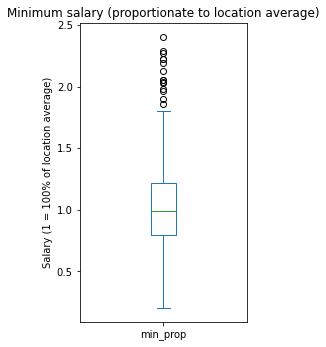

In [19]:
# Plot out the proportionate salary minimums and maximums
boxplot_prop = df['min_prop'].plot(kind='box', title = 'Minimum salary (proportionate to location average)', figsize = (3, 5.5))
boxplot_prop.set_ylabel('Salary (1 = 100% of location average)')
plt.show()

We see that there are quite a few outliers past the upper whisker of our boxplot.  We'll use matplotlib's boxplot_stats package to get more details below.

In [20]:
# Retrieve boxplot stats and store in a list to iteratively go through later
min_raw_boxplot = boxplot_stats(df['min'].values)
min_prop_boxplot = boxplot_stats(df['min_prop'].values)

plot_stats = [min_raw_boxplot, min_prop_boxplot]

In [21]:
# Grab and print the upper whiskers of the above boxplots
upper_whiskers = []
plot_names = ['min','min_prop']
for plot in range(len(plot_stats)):
    whisker = plot_stats[plot][0]['whishi']
    upper_whiskers.append(whisker)
    print(f'upper whisker for {plot_names[plot]}: {whisker}')

upper whisker for min: 140800.0
upper whisker for min_prop: 1.7999293683701096


In [22]:
# With the upper whiskers, we can re-examine our dataframe for postings with unusually high salary offerings
df_outliers = df[
    (df['min'] > upper_whiskers[0]) |
    (df['min_prop'] > upper_whiskers[1])
     ]

In [23]:
# Examine the dataframe consisting of only jobs that are considered an outlier due to one of the salary columns
df_outliers

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
758,E-commerce Data Analyst,TikTok,"san jose, ca",108798,153000.0,296000.0,1,1,1.406276,2.720638
798,Data Visualization Analyst,Surya Systems,"san jose, ca",97844,156000.0,156000.0,1,1,1.594375,1.594375
826,Business Data Analyst III // 23-00095,Akraya Inc.,"san jose, ca",108798,176800.0,191360.0,1,1,1.625030,1.758856
940,"Sr Data Analyst, Digital Platform (SQL/Python)",Braintrust,"san jose, ca",97844,208000.0,260000.0,1,1,2.125833,2.657291
1514,Data Science Analyst,SFORCE IT,"dallas, tx",80248,182104.0,182104.0,1,1,2.269265,2.269265
1570,Business Analyst,Tata Technologies Inc.,"dallas, tx",77769,187200.0,208000.0,0,1,2.407129,2.674588
2232,Associate Data Scientist - Online Business Ana...,The Home Depot,"atlanta, ga",73919,150000.0,150000.0,1,1,2.029248,2.029248
5190,Data Analyst - Remote - Healthcare,Michael Page,"san francisco, ca",97844,145588.0,187185.0,0,1,1.487960,1.913096
6032,Call and Referral Data Analyst,EvergreenHealth,"seattle, wa",49496,110032.0,110032.0,0,1,2.223048,2.223048
9736,Data Analyst,"Bertelsmann, Inc.","new york, ny",80868,166400.0,166400.0,0,1,2.057674,2.057674


It seems that many of these jobs' titles include the keywords related to experience level mentioned before, which explains some of the high pay.  Also, Job #10814 and #11503 have location average salaries below 40k, which seems more inaccurate for the former considering the job is located near Los Angeles. We may be able to attribute this to low or inaccurate salary reportings.

We'll revisit this method of observing outliers after splitting our dataset, as removing explicitly non-entry level job postings  will already remove many of our outliers, and removing job posts based on being outside of the boxplot's whiskers may negatively impact our dataset if the posting is legitimate and has no other red flags for unreliable information.

Next, we'll create boxplots for job location salary averages.

Text(0, 0.5, 'Average Salary ($)')

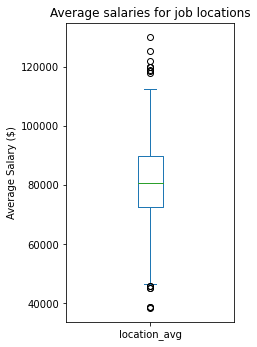

In [24]:
location_boxplot = df['location_avg'].plot(kind = 'box', title = 'Average salaries for job locations', figsize = (3, 5.5))
location_boxplot.set_ylabel('Average Salary ($)')

In [25]:
# Create & view a sub-dataframe consisting of only jobs where the job location's average salary is an outlier
location_stats = boxplot_stats(df['location_avg'].values)
location_outlier_df = df[
    (df['location_avg'] < location_stats[0]['whislo']) |
    (df['location_avg'] > location_stats[0]['whishi'])
]

In [26]:
# Examine the dataframe consisting of only jobs where the job location salary average is an outlier
location_outlier_df

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
769,Data Analyst,Alpha Net Consulting LLC,"san jose, ca",117936,47565.0,110403.0,1,1,0.403312,0.936126
1828,Senior Business Analyst,National Life Group,"dallas, tx",121910,82000.0,153000.0,0,1,0.672627,1.255024
6026,Senior Business Intelligence Analyst - Environ...,BOEING,"seattle, wa",120027,119850.0,141000.0,0,1,0.998525,1.174736
6081,Supply Chain BI Analyst,PACCAR,"seattle, wa",120027,69800.0,104300.0,1,1,0.581536,0.868971
6097,Customer Service Business Analyst,PACCAR,"seattle, wa",120027,69800.0,104300.0,1,1,0.581536,0.868971
6917,Data Analyst - Division of Research Accountabi...,Baltimore County Public Schools,washington dc,45973,81057.6,81057.6,0,1,1.763157,1.763157
7061,Technical Business Analyst,TRESUME,washington dc,130328,50000.0,55000.0,1,1,0.383647,0.422012
7927,COOP - Data Analyst,Ryder System,"baltimore, md",45897,65000.0,75000.0,1,1,1.416215,1.634094
9750,Data Analyst,TY Software,"new york, ny",125265,62400.0,119412.8,0,1,0.498144,0.953281
10436,Paid Bootcamp- STEM Entry Level Data Analyst a...,PCS Global Tech,"los angeles, ca",38830,60000.0,70000.0,0,1,1.545197,1.802730


Many of these jobs have location average salary values that seem suspiciously low, which may have been caused by poor sampling on Indeed's part. One possibility for this is that the job location has too few reported salaries. The retrieved average salary per location is based on the job posting city, not the city used in the job search scraping, meaning that if the job was posted in a very small town close enough to the city used for the job search, the reported average salary for analysts from that town may be skewed. We will decide how to handle these outliers prior to analysis.

Now is the time to experiment with splitting our dataset based on job title keywords (those being words that explicilty label the job as non-entry level). We will observe how this impacts our data distribution (including outliers) before proceeding to the final cleaning & wrangling step that will establish and finalize our dataframes for analysis. We will also experiment with including only jobs with titles that explicitly suggest an entry level position. 

The keywords we'll look for in higher seniority jobs:
* Variants of Senior or upper management
    * Senior / Sr
    * Lead
    * Manager
* Upper Tiers
    * II / III / IV / V
    * 2 / 3 / 4 / 5

The keywords we'll look for in entry level jobs:
* Junior / jr
* Entry
* Lower Tier (I / 1) 

If we notice any other keywords of interest during our examination of these keywords, we'll include those as well within this section.

In [27]:
pd.set_option('display.max_colwidth', None) # We want to see the entirety of the job names

In [28]:
# Senior
df_senior = df[df['name'].str.contains('Senior', case=False)]

df_senior

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
84,"Business Analyst, Senior - Data Analytics: 100% Remote US",Varis - US,"austin, tx",89950,89400.0,131000.0,0,1,0.993885,1.456365
822,Senior Data Analyst,Adyen,"san jose, ca",97844,135000.0,170000.0,1,1,1.379747,1.737460
855,Senior Data Analyst,Levi Strauss & Co.,"san jose, ca",97844,93500.0,145000.0,1,1,0.955603,1.481951
936,"Senior Data Analyst, Finance Reporting",Circle,"san jose, ca",97844,140000.0,185000.0,0,1,1.430849,1.890765
976,"Senior/Staff BI Analyst, Enterprise Data & Analytics | (HYBRID)",First Technology Federal Credit Union,"san jose, ca",92514,114550.0,126000.0,1,1,1.238191,1.361956
...,...,...,...,...,...,...,...,...,...,...
13414,Business Analytics - Senior Analyst,CVS Health,"hartford, ct",61817,43700.0,100000.0,0,1,0.706925,1.617678
13445,Senior Business Analyst intelliPath Connected – eviCore,Cigna,"hartford, ct",61817,84300.0,140500.0,0,1,1.363703,2.272838
13465,Senior Data Analyst,Avante,"hartford, ct",61817,80000.0,90000.0,1,1,1.294142,1.455910
13473,Senior Business Analyst of Informatics,CVS Health,"hartford, ct",61817,75400.0,162700.0,0,1,1.219729,2.631962


In [29]:
df_senior.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000
mean,81944.768421,94607.111579,130715.568421,0.463158,1.0,1.173631,1.624687
std,14642.297831,24481.323094,29990.199926,0.501286,0.0,0.310981,0.402764
min,52954.000000,43700.000000,62889.000000,0.000000,1.0,0.540387,0.878657
25%,72472.000000,75452.000000,110000.000000,0.000000,1.0,0.945394,1.316151
50%,80868.000000,90000.000000,130000.000000,0.000000,1.0,1.128746,1.596741
75%,91232.000000,110220.500000,153000.000000,1.000000,1.0,1.360237,1.903734
max,121910.000000,160000.000000,206420.000000,1.000000,1.0,1.978533,2.699959


df has a min_prop mean of 1.037148 and python mean of 0.442085, whereas df_senior has means of 1.173631 and 0.463158 respectively (along with higher 25%, median, and 75% points). If our alternative hypothesis is correct, we may be able to justifiably attribute this significant increase in the average min_prop to the fact that more jobs in our df_senior dataframe have mention of Python, but given the context of our project, we will probably elect to exclude these jobs from the final DataFrame used for addressing the null hypothesis.

In [30]:
# Sr
df_sr = df[df['name'].str.contains('sr',case=False)]

df_sr

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
940,"Sr Data Analyst, Digital Platform (SQL/Python)",Braintrust,"san jose, ca",97844,208000.0,260000.0,1,1,2.125833,2.657291
1073,SR. HR Business Analyst,Rakuten,"san jose, ca",82642,58200.0,99200.0,0,1,0.704242,1.200358
1092,Data Engineer (Sr. Business Systems Analyst),Judicial Council of California,"san jose, ca",97844,87204.0,130812.0,0,1,0.891255,1.336945
1142,Sr. BI Analyst,Safeway,"san jose, ca",99351,92000.0,119720.0,0,1,0.926010,1.205021
1662,"Data Analyst, Sr. Associate",New York Life Insurance Co,"dallas, tx",77769,90000.0,135000.0,0,1,1.157273,1.735910
2233,Sr. Performance Analyst-Data Science,Metropolitan Atlanta Rapid Transit Authority...,"atlanta, ga",73919,60778.0,75973.0,1,1,0.822224,1.027787
2505,Sr. Business Intelligence & Reporting Analyst (US),TD Bank,"atlanta, ga",73919,76128.0,124800.0,0,1,1.029884,1.688335
2544,"ANALYST, BUSINESS INSIGHTS SR",Compass One Healthcare,"atlanta, ga",73919,90000.0,115000.0,1,1,1.217549,1.555757
2640,GA DHS - Sr. Analytics Developer (694952) Remote for Time being,Samjose Infotech,"atlanta, ga",73919,108160.0,118560.0,0,1,1.463223,1.603918
2678,Sr. Analytics Developer,Cilable,"atlanta, ga",73919,118560.0,128960.0,0,1,1.603918,1.744612


In [31]:
df_sr.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,42.000000,42.000000,42.000000,42.000000,42.0,42.000000,42.000000
mean,82662.809524,87231.023810,123477.652381,0.357143,1.0,1.082805,1.551600
std,16952.725687,31427.074194,35838.062009,0.484966,0.0,0.373510,0.483477
min,50391.000000,20000.000000,20000.000000,0.000000,1.0,0.198908,0.198908
25%,73055.000000,68860.000000,103282.500000,0.000000,1.0,0.829470,1.201524
50%,80392.000000,81290.000000,120000.000000,0.000000,1.0,1.038555,1.601901
75%,97844.000000,101750.000000,130609.000000,1.000000,1.0,1.313692,1.817438
max,112522.000000,208000.000000,260000.000000,1.000000,1.0,2.125833,2.657291


df_sr has a higher min_prop than df, similarly to df_senior.  The DataFrame is also small enough to view each row, and thankfully we visually see no rows that would be mistakenly left out if we removed the rows from this subset, with the exception of job at index 10593, whose name and company suggests that it may be related to seniors as in the elderly. We'll experiment with this possibility below.

In [32]:
df_seniors = df[df['name'].str.contains('citizen|seniors|people',case=False)]

df_seniors

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
6904,Sr. Workforce Analyst (People Analytics),US Defense Counterintelligence and Security Agency,washington dc,77633,132368.0,172075.0,0,1,1.705048,2.216519
9709,HR People Data Analyst,The New York Times,"new york, ny",80868,105000.0,140000.0,0,1,1.298412,1.731216
9726,"Data Analyst, Seniors",Riseboro Community Partnership,"new york, ny",72472,75000.0,80000.0,0,1,1.034882,1.103875
10009,Senior People Analytics Analyst,VNS Health,"new york, ny",75907,82600.0,103200.0,0,1,1.088174,1.359558


Jobs at indices #9726 and #10009 have names that imply that the jobs related to senior peoples rather than a seniority in the job position. We'll keep this in mind when refining our data later.

In [33]:
# Lead
df_lead = df[df['name'].str.contains('lead', case=False)]

df_lead

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
113,Lead Data Analyst at Nood ($80k - $100k) + stock options,Nood,"austin, tx",89950,80000.0,100000.0,1,1,0.889383,1.111729
784,"Lead Product Analyst, Data Insights",PayPal,"san jose, ca",92514,96900.0,234300.0,0,1,1.047409,2.532590
856,Lead Data Analyst,Williams Sonoma,"san jose, ca",92514,140000.0,175000.0,1,1,1.513284,1.891606
2086,Lead Analyst- Finance Data Engineering – SAP FICO,Eaton,"dallas, tx",78431,87200.0,119900.0,1,1,1.111805,1.528732
2623,Lead Business Intelligence Analyst,Encore Technologies,"atlanta, ga",73919,77600.0,134000.0,0,1,1.049798,1.812795
3835,Lead Fraud Data Analyst,TIAA,"charlotte, nc",105776,98800.0,164700.0,0,1,0.934049,1.557064
4609,IT Analytics & Data Visualization Solutions Lead (NC99),Resource Management Associates LLC.,"raleigh, nc",94232,120640.0,131040.0,0,1,1.280245,1.390610
4624,Lead Analyst- Finance Data Engineering – SAP FICO,Eaton,"raleigh, nc",94232,87200.0,119900.0,1,1,0.925376,1.272392
9744,Data Analysis Lead Analyst,Cigna,"new york, ny",57244,70100.0,116800.0,0,1,1.224582,2.040389
9857,IT Lead Analyst - Investment Data Governance,Global Atlantic Financial Group Opportunities,"new york, ny",80868,74178.0,141290.0,1,1,0.917273,1.747168


In [34]:
df_lead.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,79413.055556,93093.222222,137203.333333,0.500000,1.0,1.193985,1.752318
std,15275.596792,22090.903714,33491.096622,0.514496,0.0,0.299799,0.371504
min,51972.000000,70000.000000,85000.000000,0.000000,1.0,0.889383,1.111729
25%,66015.250000,75033.500000,119900.000000,0.000000,1.0,1.038491,1.535815
50%,80868.000000,87200.000000,127185.000000,0.500000,1.0,1.154034,1.743465
75%,92477.750000,99700.000000,156250.000000,1.000000,1.0,1.269329,1.897267
max,105776.000000,140000.000000,234300.000000,1.000000,1.0,2.190675,2.532590


Once again, we see a significantly higher min_prop mean in the subset. After inspecting each row's job name, we see that parsing for "lead" did not mistakenly grab rows we might've wanted to keep if the subset were to contain entry level roles, so we will use this keyword when it comes to refining.

In [35]:
# Manager
df_manager = df[df['name'].str.contains('manager', case=False)]

df_manager

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop


The keyword "manager" is not in any of the rows of our dataset, so we won't need to be concerned with it when it comes to wrangling df based on keywords later.

In [36]:
# II/III/IV/V
df_numeral = df[df['name'].str.contains('II|III|IV')] # V is omitted, case is left True
df_numeral_lower = df[df['name'].str.contains('ii|iii|iv')] #See if any jobs use lowercase roman numerals for tier

df_numeral

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
93,Data Analyst IV,Texas Department of Transportation,"austin, tx",89950,59004.0,59004.0,0,1,0.655964,0.655964
125,"Data Analyst III - Transportation Planning and Programming - Austin, TX",Texas Department of Transportation,"austin, tx",89950,84479.0,84479.0,0,1,0.939177,0.939177
173,TJJD - Data Analyst II / III / IV - Strategic Data Analyst - (AUS) - 27449,TEXAS JUVENILE JUSTICE DEPARTMENT,"austin, tx",89950,45156.0,66000.0,1,1,0.502012,0.733741
219,Data Insights Analyst II,Care.com,"austin, tx",89950,92800.0,139200.0,1,1,1.031684,1.547526
826,Business Data Analyst III // 23-00095,Akraya Inc.,"san jose, ca",108798,176800.0,191360.0,1,1,1.625030,1.758856
1023,"Analyst II, Seller Planning - ETS",Walmart,"san jose, ca",102829,64480.0,102500.0,0,1,0.627060,0.996801
2324,Informatics Data Analyst II (GA41),Resource Management Associates LLC.,"atlanta, ga",73919,105248.0,105248.0,1,1,1.423829,1.423829
2629,Business Analyst IV-,"Orpine, Inc. Internal","atlanta, ga",108193,128960.0,128960.0,0,1,1.191944,1.191944
5938,Data Analyst II,Fred Hutchinson Cancer Research Center,"seattle, wa",82620,74358.0,111536.0,0,1,0.900000,1.349988
6000,Business Analyst II - Product Analytics,Rover,"seattle, wa",82620,82384.0,105451.0,1,1,0.997144,1.276337


In [37]:
df_numeral_lower

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
865,Research Analyst for State and Local Governance Initiative,Stanford University,"san jose, ca",91199,64000.0,85000.0,1,1,0.701762,0.932028
957,Data Analytics Associate- Remote Eligible (Human Services Division),Mathematica Policy Research,"san jose, ca",87223,60000.0,70000.0,1,1,0.687892,0.802541
1525,(DBI) Data Science Analyst I (Non Civil Service),"City of Dallas, TX","dallas, tx",77769,57656.0,72070.0,1,1,0.741375,0.926719
6031,Data Analytics Associate- Remote Eligible (Human Services Division),Mathematica Policy Research,"seattle, wa",82620,60000.0,70000.0,1,1,0.726216,0.847252
6917,Data Analyst - Division of Research Accountability Assessment - Contractual,Baltimore County Public Schools,washington dc,45973,81057.6,81057.6,0,1,1.763157,1.763157
7945,Data Analytics Associate- Remote Eligible (Human Services Division),Mathematica Policy Research,"baltimore, md",82479,60000.0,70000.0,1,1,0.727458,0.848701
9698,"Data Product Analyst, Healthcare – Alternative Data",Guidepoint,"new york, ny",80868,75000.0,110000.0,1,1,0.927437,1.360241
9703,"Data Product Analyst, Healthcare – Alternative Data",Guidepoint Global,"new york, ny",80868,75000.0,110000.0,1,1,0.927437,1.360241
9798,Quantitative Data Analyst,Fund For Public Health In New York Inc,"new york, ny",93755,65000.0,70000.0,0,1,0.693296,0.746627
10666,"Business Analyst, Integrated Care Delivery",SCAN Health Plan,"los angeles, ca",70490,64000.0,102400.0,1,1,0.907930,1.452688


In [38]:
df_numeral.loc[df_numeral.index != 10082].describe()  # row at index 10082 should not have been included, more on this later

,location_avg,min,max,python,tableau,min_prop,max_prop
count,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000
mean,81210.166667,85829.666667,108318.391667,0.500000,1.0,1.098762,1.398517
std,16116.651135,29660.078321,31906.134349,0.510754,0.0,0.404293,0.528168
min,38830.000000,45156.000000,59004.000000,0.000000,1.0,0.502012,0.655964
25%,70999.500000,65000.000000,87760.250000,0.000000,1.0,0.787915,0.982395
50%,82549.500000,80810.000000,104932.000000,0.500000,1.0,1.018628,1.324002
75%,89950.000000,89840.500000,129261.750000,1.000000,1.0,1.395342,1.596184
max,108798.000000,176800.000000,191360.000000,1.000000,1.0,2.040587,2.694206


In [39]:
# V as in 5
df_v = df[df['name'].str.contains('V')]
df_v_lower = df[df['name'].str.contains('v')]

df_v

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
93,Data Analyst IV,Texas Department of Transportation,"austin, tx",89950,59004.0,59004.0,0,1,0.655964,0.655964
173,TJJD - Data Analyst II / III / IV - Strategic Data Analyst - (AUS) - 27449,TEXAS JUVENILE JUSTICE DEPARTMENT,"austin, tx",89950,45156.0,66000.0,1,1,0.502012,0.733741
186,COS Sys Analyst V,Dept of Family & Protectve Svc,"austin, tx",89950,59004.0,96720.0,0,1,0.655964,1.075264
798,Data Visualization Analyst,Surya Systems,"san jose, ca",97844,156000.0,156000.0,1,1,1.594375,1.594375
914,"Data Visualization & Democratization, Expert",Blue Shield of California,"san jose, ca",87223,118800.0,178200.0,0,1,1.362026,2.043039
1532,"Corporate Business Data Analyst - Valhalla (Westchester County), NY, Newtown Square, PA, Florham Park, NJ, Atlanta, GA, Dallas, TX",USI Holdings Corporation,"dallas, tx",77769,90000.0,105000.0,0,1,1.157273,1.350152
2629,Business Analyst IV-,"Orpine, Inc. Internal","atlanta, ga",108193,128960.0,128960.0,0,1,1.191944,1.191944
4609,IT Analytics & Data Visualization Solutions Lead (NC99),Resource Management Associates LLC.,"raleigh, nc",94232,120640.0,131040.0,0,1,1.280245,1.390610
5207,Business Intelligence Analyst |ENTRY LEVEL|,PCS Global Tech,"san francisco, ca",97844,98931.0,105918.0,1,1,1.011110,1.082519
5960,Data Visualization Specialist,Davis Wright Tremaine LLP,"seattle, wa",82620,76793.6,85342.4,0,1,0.929480,1.032951


In [40]:
df_v_lower

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
28,GTM Revenue Operations Data Analyst,UiPath,"austin, tx",89950,64000.0,88000.0,0,1,0.711506,0.978321
207,AIX Data Analyst with Strong SQL Server,Dutech,"austin, tx",89950,114400.0,135200.0,0,1,1.271818,1.503057
865,Research Analyst for State and Local Governance Initiative,Stanford University,"san jose, ca",91199,64000.0,85000.0,1,1,0.701762,0.932028
957,Data Analytics Associate- Remote Eligible (Human Services Division),Mathematica Policy Research,"san jose, ca",87223,60000.0,70000.0,1,1,0.687892,0.802541
1127,Development Senior Data Analyst,Second Harvest of Silicon Valley,"san jose, ca",92514,70866.0,85888.0,0,1,0.766003,0.928378
...,...,...,...,...,...,...,...,...,...,...
12507,Data Analytics Associate- Remote Eligible (Human Services Division),Mathematica Policy Research,"baltimore, md",81569,60000.0,70000.0,1,1,0.735574,0.858169
13419,Business Analytics Lead Analyst - Work from home - eviCore,Cigna,"hartford, ct",61817,72800.0,121400.0,1,1,1.177670,1.963861
13425,Business Intelligence Analyst-eviCore-Work from Home,Cigna,"hartford, ct",61817,74900.0,124800.0,0,1,1.211641,2.018862
13445,Senior Business Analyst intelliPath Connected – eviCore,Cigna,"hartford, ct",61817,84300.0,140500.0,0,1,1.363703,2.272838


Some findings concerning the roman numeral tiers:

* Job at index 10082: Tier I, but was included in the search for "IV" since the job name contains "HIV"
* For tier V, searching for "Analyst V" would produce the rows we're actually looking for without the excess rows.
* Too many rows were returned for "v" to be certain, but based off of our findings for the lowercase "ii/iii/iv", we can infer that none of the jobs in our dataset use lowercase roman numerals for marking the job's tier, so we can rule out the need to separate jobs based on lowercase roman numerals.
* df_numeral had a min_prop mean of over 1.09 (after omitting index 10082)

We'll keep the above in mind for later.

In [41]:
# 2/3/4/5
df_numbers = df[df['name'].str.contains('2|3|4|5')]

df_numbers

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
69,Data Analyst : 22-05742,Akraya Inc.,"austin, tx",89950,114400.0,118560.0,0,1,1.271818,1.318066
173,TJJD - Data Analyst II / III / IV - Strategic Data Analyst - (AUS) - 27449,TEXAS JUVENILE JUSTICE DEPARTMENT,"austin, tx",89950,45156.0,66000.0,1,1,0.502012,0.733741
757,Business Data Analyst I - # 23-00092,Akraya Inc.,"san jose, ca",108798,124800.0,139360.0,1,1,1.147080,1.280906
826,Business Data Analyst III // 23-00095,Akraya Inc.,"san jose, ca",108798,176800.0,191360.0,1,1,1.625030,1.758856
1054,PROGR001232 Programmer/Analyst I,Northern California Institute for Research and...,"san jose, ca",97844,69451.2,130000.0,1,1,0.709816,1.328646
1089,"Senior Analyst, B2B Marketing Strategy & Analytics",Grammarly,"san jose, ca",97844,128000.0,158000.0,0,1,1.308205,1.614815
1508,Data Analyst I (226 Days),Dallas Independent School District,"dallas, tx",77769,63280.0,63280.0,1,1,0.813692,0.813692
1511,Business Data Analyst I / 23-00213,Akraya Inc.,"dallas, tx",80248,83200.0,87360.0,0,1,1.036786,1.088625
1512,2023 Focused Analytics Solutions Team (FAST) Full-Time Associate Program - Data Science,"JPMorgan Chase Bank, N.A.","dallas, tx",80248,125000.0,125000.0,1,1,1.557671,1.557671
2324,Informatics Data Analyst II (GA41),Resource Management Associates LLC.,"atlanta, ga",73919,105248.0,105248.0,1,1,1.423829,1.423829


Most of the rows grabbed from searching for numbers 2 through 5 in the job are not (explicitly) higher tier roles, and the ones that are can be more efficiently extracted from searching names containing "Level 2", "Level 3", "Analyst 2", "Analyst 3", "P3", "Specialist 2", "Officer 3".  We'll attempt this below.

In [42]:
better_keywords = 'Level 2|Level 3|Analyst 2|Analyst 3|P3|Specialist 2|Officer 3'
df_numbers = df[df['name'].str.contains(better_keywords)]

df_numbers

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
6100,Functional Program Analyst 3,State of Washington Office of the Insurance...,"seattle, wa",63975,55872.0,75120.0,0,1,0.873341,1.174209
6104,Regulatory Analyst 3,State of Washington Utilities and Transportation...,"seattle, wa",62840,71520.0,93840.0,1,1,1.138129,1.493316
7020,"Advisor, Data Analyst - Financial Architecture (P3)",Save the Children,washington dc,82479,68850.0,76950.0,0,1,0.834758,0.932965
8223,"Platform Specialist 2, Data Visualization","Adswerve, Inc.","boulder, co",71181,65000.0,78000.0,0,1,0.913165,1.095798
9860,Data Analyst (Clinical Business Analyst Level 2),NYC Health + Hospitals,"new york, ny",72472,70000.0,80000.0,0,1,0.965890,1.103875
9936,"Data Analyst 2 - 46215, 47095, 47097",NYS Department of Health,"new york, ny",80868,79325.0,100342.0,1,1,0.980920,1.240812
9997,Data Analyst 3 - 47096,NYS Department of Health,"new york, ny",80868,97826.0,120492.0,1,1,1.209700,1.489984
10567,Data Systems Analyst 3 - Enterprise Data and Analytics - FT Days (Remote),UC Irvine Health,"los angeles, ca",94012,78900.0,145100.0,0,1,0.839255,1.543420
10920,Sr. Quality Analyst (Level 3),Sikorsky Aircraft Corporation,"los angeles, ca",100549,20000.0,20000.0,0,1,0.198908,0.198908
11166,"Data Analyst 2 - UHC M&R IS - Horsham, PA or telecommute",UnitedHealth Group,"trenton, nj",118977,66100.0,118300.0,1,1,0.555570,0.994310


In [43]:
df_numbers.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000
mean,79785.363636,67185.818182,90427.000000,0.363636,1.0,0.894374,1.183549
std,19405.978719,19014.976134,32301.637293,0.504525,0.0,0.310765,0.415621
min,49418.000000,20000.000000,20000.000000,0.000000,1.0,0.198908,0.198908
25%,67578.000000,65325.500000,77475.000000,0.000000,1.0,0.837006,1.045054
50%,80868.000000,68850.000000,86553.000000,0.000000,1.0,0.913165,1.174209
75%,88245.500000,75210.000000,109321.000000,1.000000,1.0,1.059524,1.491650
max,118977.000000,97826.000000,145100.000000,1.000000,1.0,1.328484,1.751447


Interestingly, this subset has a lower min_prop mean than df.  However, it also has a lower python mean which, in the event that our alternative hypothesis describes the population, would explain the lower min_prop mean. 

In [44]:
# Junior
df_junior = df[df['name'].str.contains('Junior',case=False)]

df_junior

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
6726,Data Analyst Junior,SAG Corporation,washington dc,66460,50000.0,55000.0,0,1,0.752332,0.827565
6811,Administrator I (NC22071) (Junior Policy and Data Analyst - SSBCI),State of Maryland,washington dc,61538,48235.2,62441.6,1,1,0.783828,1.014684
10094,"Junior Associate, Data & Analytics - NYC",AdTheorent,"new york, ny",80868,55000.0,60000.0,0,1,0.680121,0.741950
10489,Junior Data Analyst,Los Angeles Apparel,"los angeles, ca",63679,33280.0,33280.0,0,1,0.522621,0.522621
11213,Junior Data Analyst,Cobbs Creek Healthcare,"trenton, nj",45134,55000.0,65000.0,1,1,1.218594,1.440156
13416,Junior Data Analyst: CHR Support - 4590 - FULLY REMOTE!,Community Health Resources (CHR),"hartford, ct",81286,33425.6,33425.6,0,1,0.411210,0.411210


In [45]:
df_junior.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000
mean,66494.166667,45823.466667,51524.533333,0.333333,1.0,0.728118,0.826364
std,13521.479629,10027.193728,14457.643893,0.516398,0.0,0.279005,0.369850
min,45134.000000,33280.000000,33280.000000,0.000000,1.0,0.411210,0.411210
25%,62073.250000,37128.000000,38819.200000,0.000000,1.0,0.561996,0.577453
50%,65069.500000,49117.600000,57500.000000,0.000000,1.0,0.716226,0.784758
75%,77266.000000,53750.000000,61831.200000,0.750000,1.0,0.775954,0.967904
max,81286.000000,55000.000000,65000.000000,1.000000,1.0,1.218594,1.440156


This subset has a lower mean min_prop of 0.728118 along with a lower python mean of 0.333333.

In [46]:
# Jr
df_jr = df[df['name'].str.contains('jr',case=False)]

df_jr

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
6791,Jr. Data Analyst,TRESUME,washington dc,111927,50000.0,55000.0,1,1,0.446720,0.491392
9894,Jr. Data Analyst,Kani Solutions Inc.,"new york, ny",76453,52000.0,62400.0,0,1,0.680156,0.816188


In [47]:
df_jr.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000
mean,94190.000000,51000.000000,58700.000000,0.500000,1.0,0.563438,0.653790
std,25083.905956,1414.213562,5232.590181,0.707107,0.0,0.165065,0.229665
min,76453.000000,50000.000000,55000.000000,0.000000,1.0,0.446720,0.491392
25%,85321.500000,50500.000000,56850.000000,0.250000,1.0,0.505079,0.572591
50%,94190.000000,51000.000000,58700.000000,0.500000,1.0,0.563438,0.653790
75%,103058.500000,51500.000000,60550.000000,0.750000,1.0,0.621797,0.734989
max,111927.000000,52000.000000,62400.000000,1.000000,1.0,0.680156,0.816188


There are only two rows that even contain the keyword "jr".  One contains mention of Python and the other doesn't, and both have below average (compared to df)  min_prop values.

In [48]:
# Entry
df_entry = df[df['name'].str.contains('Entry',case=False)]

df_entry

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
1498,Entry level Business /Data Analyst,TRESUME,"dallas, tx",77769,62400.0,72800.0,1,1,0.802376,0.936106
2471,Entry Level Business Analyst,TRESUME,"atlanta, ga",108193,50000.0,55000.0,1,1,0.462137,0.508351
5207,Business Intelligence Analyst |ENTRY LEVEL|,PCS Global Tech,"san francisco, ca",97844,98931.0,105918.0,1,1,1.011110,1.082519
6704,Entry Level Business Analyst/Data Analyst,TRESUME,washington dc,82479,58240.0,72800.0,1,1,0.706119,0.882649
9686,Paid Bootcamp- STEM Entry Level Data Analyst and Visualization,PCS Global Tech,"new york, ny",72472,60000.0,70000.0,0,1,0.827906,0.965890
9791,Entry Level Data Analyst (Loss Control),Greater New York Mutual Insurance Company,"new york, ny",80868,43700.0,86500.0,0,1,0.540387,1.069644
9850,Entry Level Business Intelligence Analyst (Training),PCS GLOBAL TECH,"new york, ny",80868,65000.0,75000.0,1,1,0.803779,0.927437
9934,Entry Level Business Analyst (Training),PCS GLOBAL TECH,"new york, ny",80868,65000.0,75000.0,1,1,0.803779,0.927437
10436,Paid Bootcamp- STEM Entry Level Data Analyst and Visualization,PCS Global Tech,"los angeles, ca",38830,60000.0,70000.0,0,1,1.545197,1.802730
10521,Entry Level Business Intelligence Analyst (Training),PCS GLOBAL TECH,"los angeles, ca",63679,65000.0,75000.0,1,1,1.020745,1.177782


In [49]:
df_entry.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000
mean,77899.454545,62410.090909,75528.909091,0.727273,1.0,0.847371,1.025225
std,17733.529701,13799.905945,12448.355437,0.467099,0.0,0.285502,0.308532
min,38830.000000,43700.000000,55000.000000,0.000000,1.0,0.462137,0.508351
25%,72748.000000,58240.000000,71400.000000,0.500000,1.0,0.751833,0.927437
50%,80868.000000,60000.000000,72800.000000,1.000000,1.0,0.803779,0.965890
75%,81673.500000,65000.000000,75000.000000,1.000000,1.0,0.919508,1.076082
max,108193.000000,98931.000000,105918.000000,1.000000,1.0,1.545197,1.802730


Of the rows retrieved from searching for "Entry" in the job name, two are for paid bootcamps. Since we want our analysis to be based on solid, posted job openings for data analysis rather than bootcamps and internships, we'll also include an examination on to what extent our dataset includes jobs with the keywords "bootcamp" and "intern" below:

In [50]:
df_boot = df[df['name'].str.contains('bootcamp|intern|train|apprentice', case=False)]

df_boot

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
1746,Senior Internal Audit Data Analyst,TIAA,"dallas, tx",65666,88100.0,146800.0,1,1,1.341638,2.235556
7134,Business Analysis Training Batch,TekSyntax Inc,washington dc,100813,52000.0,104000.0,0,1,0.515806,1.031613
7421,Business Analyst TRAINING BATCH,"COLLABORAIT, INC",washington dc,100813,52000.0,104000.0,0,1,0.515806,1.031613
8266,Senior Business Analyst - Denver International Airport,City and County of Denver,"boulder, co",58761,68905.0,113693.0,0,1,1.172632,1.934838
9686,Paid Bootcamp- STEM Entry Level Data Analyst and Visualization,PCS Global Tech,"new york, ny",72472,60000.0,70000.0,0,1,0.827906,0.965890
9850,Entry Level Business Intelligence Analyst (Training),PCS GLOBAL TECH,"new york, ny",80868,65000.0,75000.0,1,1,0.803779,0.927437
9934,Entry Level Business Analyst (Training),PCS GLOBAL TECH,"new york, ny",80868,65000.0,75000.0,1,1,0.803779,0.927437
10436,Paid Bootcamp- STEM Entry Level Data Analyst and Visualization,PCS Global Tech,"los angeles, ca",38830,60000.0,70000.0,0,1,1.545197,1.802730
10521,Entry Level Business Intelligence Analyst (Training),PCS GLOBAL TECH,"los angeles, ca",63679,65000.0,75000.0,1,1,1.020745,1.177782


The above cell retrieved jobs that were irrelevant to the search term "intern" ("Internal" and "International"), and the two bootcamp positions that were retrieved were the same two that were observed in the previous cell.  Searching for the keyword "Train" gave us rows with job names that suggest that the position is similar to a paid bootcamp or internship, where the required skills are acquired during training.  Our research question focuses on the pay grade between jobs with Python and Tableau in their description.  A mention of Python in the descriptions of the trainee positions is not equivalent to Python being mentioned in the description of a normal job, since one describes a skill to be taught and the other describes a skill sought out for at the time of hire. We'll likely remove all of these types of rows during the refinement of our DataFrame(s).

In [51]:
# I / 1
df_i = df[df['name'].str.contains('I')]
df_1 = df[df['name'].str.contains('1')]

df_i

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
63,Data Analyst with AIX and SQL,Dutech System,"austin, tx",89950,124800.0,135200.0,0,1,1.387437,1.503057
93,Data Analyst IV,Texas Department of Transportation,"austin, tx",89950,59004.0,59004.0,0,1,0.655964,0.655964
125,"Data Analyst III - Transportation Planning and Programming - Austin, TX",Texas Department of Transportation,"austin, tx",89950,84479.0,84479.0,0,1,0.939177,0.939177
173,TJJD - Data Analyst II / III / IV - Strategic Data Analyst - (AUS) - 27449,TEXAS JUVENILE JUSTICE DEPARTMENT,"austin, tx",89950,45156.0,66000.0,1,1,0.502012,0.733741
207,AIX Data Analyst with Strong SQL Server,Dutech,"austin, tx",89950,114400.0,135200.0,0,1,1.271818,1.503057
...,...,...,...,...,...,...,...,...,...,...
13425,Business Intelligence Analyst-eviCore-Work from Home,Cigna,"hartford, ct",61817,74900.0,124800.0,0,1,1.211641,2.018862
13459,CBFS - Business Intelligence Analyst,Constitution Billing and Financial Services LLC,"hartford, ct",92197,70000.0,80000.0,0,1,0.759244,0.867707
13473,Senior Business Analyst of Informatics,CVS Health,"hartford, ct",61817,75400.0,162700.0,0,1,1.219729,2.631962
13474,Senior BI Analyst,IFG Companies,"hartford, ct",61817,115000.0,130000.0,0,1,1.860330,2.102981


In [52]:
df_1

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
75,Data Systems Analyst -100% remote in Texas,Health & Human Services Comm,"austin, tx",89950,51612.0,84480.0,0,1,0.573785,0.939188
84,"Business Analyst, Senior - Data Analytics: 100% Remote US",Varis - US,"austin, tx",89950,89400.0,131000.0,0,1,0.993885,1.456365
113,Lead Data Analyst at Nood ($80k - $100k) + stock options,Nood,"austin, tx",89950,80000.0,100000.0,1,1,0.889383,1.111729
1054,PROGR001232 Programmer/Analyst I,Northern California Institute for Research and...,"san jose, ca",97844,69451.2,130000.0,1,1,0.709816,1.328646
1511,Business Data Analyst I / 23-00213,Akraya Inc.,"dallas, tx",80248,83200.0,87360.0,0,1,1.036786,1.088625
2324,Informatics Data Analyst II (GA41),Resource Management Associates LLC.,"atlanta, ga",73919,105248.0,105248.0,1,1,1.423829,1.423829
6811,Administrator I (NC22071) (Junior Policy and Data Analyst - SSBCI),State of Maryland,washington dc,61538,48235.2,62441.6,1,1,0.783828,1.014684
9936,"Data Analyst 2 - 46215, 47095, 47097",NYS Department of Health,"new york, ny",80868,79325.0,100342.0,1,1,0.980920,1.240812
10119,Centralized Reporting & Analytics Analyst II - 100% Remote,Radian,"new york, ny",80868,57425.0,92000.0,1,1,0.710108,1.137656


both subsets extracted irrelevant rows, so we'll try a more specific search below using the same strategy we used for upper tiers:

In [53]:
df_i = df[(df['name'].str.contains('Analyst I|Administrator I') & (~df['name'].str.contains('II|III|IV')))]

df_i

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
757,Business Data Analyst I - # 23-00092,Akraya Inc.,"san jose, ca",108798,124800.0,139360.0,1,1,1.147080,1.280906
1054,PROGR001232 Programmer/Analyst I,Northern California Institute for Research and...,"san jose, ca",97844,69451.2,130000.0,1,1,0.709816,1.328646
1508,Data Analyst I (226 Days),Dallas Independent School District,"dallas, tx",77769,63280.0,63280.0,1,1,0.813692,0.813692
1511,Business Data Analyst I / 23-00213,Akraya Inc.,"dallas, tx",80248,83200.0,87360.0,0,1,1.036786,1.088625
1525,(DBI) Data Science Analyst I (Non Civil Service),"City of Dallas, TX","dallas, tx",77769,57656.0,72070.0,1,1,0.741375,0.926719
6811,Administrator I (NC22071) (Junior Policy and Data Analyst - SSBCI),State of Maryland,washington dc,61538,48235.2,62441.6,1,1,0.783828,1.014684
7023,Administrator I (NC22070) (Research Data & Visualization Specialist - SSBCI),State of Maryland,washington dc,61538,48235.2,62441.6,1,1,0.783828,1.014684
11745,Infrastructure - Business Analyst I,"NucoreVision, Inc","trenton, nj",73024,62400.0,72800.0,0,1,0.854514,0.996933


In [54]:
df_i.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,8.000000,8.000000,8.000000,8.00000,8.0,8.000000,8.000000
mean,79816.000000,69657.200000,86219.150000,0.75000,1.0,0.858865,1.058111
std,16422.258336,25012.416519,31120.123731,0.46291,0.0,0.153094,0.172493
min,61538.000000,48235.200000,62441.600000,0.00000,1.0,0.709816,0.813692
25%,70152.500000,55300.800000,63070.400000,0.75000,1.0,0.773215,0.979379
50%,77769.000000,62840.000000,72435.000000,1.00000,1.0,0.798760,1.014684
75%,84647.000000,72888.400000,98020.000000,1.00000,1.0,0.900082,1.136695
max,108798.000000,124800.000000,139360.000000,1.00000,1.0,1.147080,1.328646


With more specific keywords based on our findings for "I" and "1", we were able to retrieve the rows that specified for entry level or lower tiered roles. Although most rows had a job with Python mentioned in the job description, min_prop remains low.

With the insights gained from this section thus far, we can create 4 DataFrames of varying levels regarding "job level" to contribute to our final analysis.

Here are the DataFrames and their associated keywords to include or exclude:
* (df_1) DataFrame with both higher and lower seniority/level-related keywords, with the exception (or the exclusion) of intern, trainee or bootcamp-type keywords:
    * Train (exclude)
    * Bootcamp (exclude)
    
    
* (df_2) DataFrame with ONLY higher seniority/level-related keywords in the job name:
    * Senior / Sr
    * Lead
    * Level 2 / Level 3
    * II/III/IV (exclude "HIV" for job at index 10082)
    * Analyst 2 / Analyst 3 / Analyst 4 / Analyst 5 / Analyst V
    * Specialist 2
    * Officer 3
    * P3
    * Seniors / Senior People (exclude for jobs at indices 9726 and 10009)
    * **Exclude index 10593
    
    
* (df_3) DataFrame without higher seniority/level-related keywords. This is just an inverse of the previously described DataFrame. The intern, trainee & bootcamp keywords will also be excluded.


* (df_4) DataFrame with ONLY lower seniority/level-related keywords in the job name
    * Junior /Jr
    * Entry
    * Analyst I|Administrator I (exclude II, III, IV)

    

* For the sake of avoiding convoluted DataFrame names, we'll just using the naming convention of df_#, where # is the DataFrame's placement in the list above.

In [55]:
# df_1 creation
df_1 = df[~df['name'].str.contains('train|bootcamp',case=False)]

In [56]:
# df_2 creation
df_2 = df_1[((df_1['name'].str.contains('Senior|Sr|Lead', case=False)) |
          (df_1['name'].str.contains('Level 2|Level 3|Analyst 2|Analyst 3|Analyst 4|Analyst 5|Analyst V',case=False)) |
          (df_1['name'].str.contains('II|III|IV')) |
          (df_1['name'].str.contains('Specialist 2|Officer 3|P3',case=False))) &
          (~df_1['name'].str.contains('HIV|Seniors|Senior People'))]
df_2 = df_2.loc[df_2.index != 10593] # This job is most likely about Senior citizen data

In [57]:
# df_3 creation
# df_3 is all rows of df_1 that aren't in df_2.  We'll perform a minus join to accomplish this.
df_merge = df_1.merge(df_2.drop_duplicates(), how='left', indicator=True)
df_3 = df_merge[df_merge['_merge'] == 'left_only']
df_3 = df_3.drop(columns='_merge')

In [58]:
# df_4 creation
df_4 = df_1[((df_1['name'].str.contains('Junior|Jr|Entry',case=False) |
            (df_1['name'].str.contains('Analyst I|Administrator I'))) &
            (~df_1['name'].str.contains('II|III|IV')))]

In [59]:
# Create a dictionary to iterate through when referring to DataFrames
df_dict = {'df_1':df_1, 'df_2':df_2, 'df_3':df_3, 'df_4':df_4}

# check and print the size of each DataFrame
for df in df_dict:
    print(f'length of {df}: {len(df_dict[df])}')

length of df_1: 511
length of df_2: 186
length of df_3: 325
length of df_4: 21


Our research question best fits the jobs of df_4, however, it's smaller size may prohibit us from testing against the null hypothesis in good faith, since there might just not be enough data. A good compromise may be using df_3 to challenge the null hypothesis, but we will make a more informed decision after evaluating outliers and the distributions of our data below.

In [60]:
df_min_props = pd.DataFrame(columns = df_dict.keys())
df_mins = pd.DataFrame(columns = df_dict.keys())
for df in df_dict:
    df_min_props[df] = pd.Series(df_dict[df]['min_prop'].values)
    df_mins[df] = pd.Series(df_dict[df]['min'].values)
    


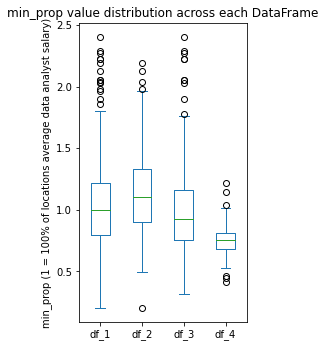

In [61]:
boxplot = df_min_props.plot(
    kind = 'box', 
    title = 'min_prop value distribution across each DataFrame',
    figsize = (3,5.5)
)
boxplot.set_ylabel('min_prop (1 = 100% of locations average data analyst salary)')
plt.show()

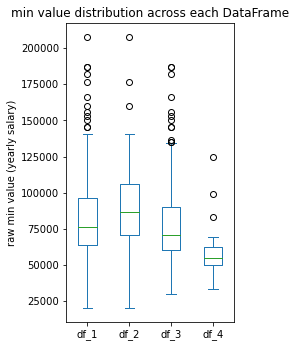

In [62]:
# Repeat the above for raw min values
boxplot = df_mins.plot(
    kind = 'box', 
    title = 'min value distribution across each DataFrame',
    figsize = (3,5.5)
)
boxplot.set_ylabel('raw min value (yearly salary)')
plt.show()

Generally, we can see that as we refine our DataFrame to more consistenly reflect jobs intended for those newer to data analysis as a career, the overall distribution of min and min_prop values shifts further down. Each DataFrame has its own share of upper outliers, and only df_2 and df_4 have outliers from being under the lower whisker for min_prop. 

We can create a DataFrame of only outliers from above to observe any similarities or patterns amongst these jobs, starting with min and then min_prop:

In [63]:
# Create functions for getting outliers and printing the whisker boundaries
def outliers_of(dataframe, column): 
    '''
    Inputs:
        - dataframe: the DataFrame whose outlier values will be extracted
        - column: column of DataFrame to search for outlier values in
    Outputs: 
        - a DataFrame consisting only of rows of inputted DataFrame that have outlier values in the inputted column
    '''
    stats = boxplot_stats(dataframe[column].values)
    upper_bound = stats[0]['whishi']
    lower_bound = stats[0]['whislo']
    df_outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return df_outliers

def print_whiskers(dataframe, column): 
    '''
    Inputs:
        - dataframe: the DataFrame whose boxplot whisker values will be extracted
        - column: the column of the DataFrame to apply boxplot_stats to
    Outputs:
        - the upper and lower whiskers are printed, nothing else is returned.
    '''
    stats = boxplot_stats(dataframe[column].values)
    upper_bound = stats[0]['whishi']
    lower_bound = stats[0]['whislo']
    print(f'Upper whisker: {upper_bound}')
    print(f'Lower whisker: {lower_bound}')

In [64]:
# Examine df_1 min outliers
outliers = outliers_of(df_1, 'min')
print_whiskers(df_1, 'min')
outliers

Upper whisker: 140800.0
Lower whisker: 20000.0


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
758,E-commerce Data Analyst,TikTok,"san jose, ca",108798,153000.0,296000.0,1,1,1.406276,2.720638
798,Data Visualization Analyst,Surya Systems,"san jose, ca",97844,156000.0,156000.0,1,1,1.594375,1.594375
826,Business Data Analyst III // 23-00095,Akraya Inc.,"san jose, ca",108798,176800.0,191360.0,1,1,1.625030,1.758856
940,"Sr Data Analyst, Digital Platform (SQL/Python)",Braintrust,"san jose, ca",97844,208000.0,260000.0,1,1,2.125833,2.657291
1514,Data Science Analyst,SFORCE IT,"dallas, tx",80248,182104.0,182104.0,1,1,2.269265,2.269265
1570,Business Analyst,Tata Technologies Inc.,"dallas, tx",77769,187200.0,208000.0,0,1,2.407129,2.674588
2232,Associate Data Scientist - Online Business Analytics (Remote),The Home Depot,"atlanta, ga",73919,150000.0,150000.0,1,1,2.029248,2.029248
5190,Data Analyst - Remote - Healthcare,Michael Page,"san francisco, ca",97844,145588.0,187185.0,0,1,1.487960,1.913096
9736,Data Analyst,"Bertelsmann, Inc.","new york, ny",80868,166400.0,166400.0,0,1,2.057674,2.057674
9952,Senior Data Analyst,Match Group,"new york, ny",80868,160000.0,190000.0,1,1,1.978533,2.349508


df_1 has a lower whisker of 20000, which would be under the minimum wage in many if not most states. The highest minimum wage is in DC, with a minimum wage of 16.50/hr, which equates to 34320/yr.  We'll see which jobs pay less than this amount below:

In [65]:
df_1[df_1['min']<=34320]

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
10489,Junior Data Analyst,Los Angeles Apparel,"los angeles, ca",63679,33280.0,33280.0,0,1,0.522621,0.522621
10685,Data Analyst,GSS,"los angeles, ca",94012,30000.0,40000.0,0,1,0.319108,0.425478
10920,Sr. Quality Analyst (Level 3),Sikorsky Aircraft Corporation,"los angeles, ca",100549,20000.0,20000.0,0,1,0.198908,0.198908
13416,Junior Data Analyst: CHR Support - 4590 - FULLY REMOTE!,Community Health Resources (CHR),"hartford, ct",81286,33425.6,33425.6,0,1,0.411210,0.411210


Searching for data analyst jobs in Los Angeles resulted in two positions (indices 10685 & 10920) that pay less than California's minimum wage:
(15.50/hr * 40hrs/wk * 52wks/yr = 32240/yr). We'll remove these later since we can attribute the min values of these rows to entry errors or some other mistake.

In [66]:
# Continue on with df_2
outliers = outliers_of(df_2, 'min')
print_whiskers(df_2, 'min')
outliers

Upper whisker: 140800.0
Lower whisker: 20000.0


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
826,Business Data Analyst III // 23-00095,Akraya Inc.,"san jose, ca",108798,176800.0,191360.0,1,1,1.625030,1.758856
940,"Sr Data Analyst, Digital Platform (SQL/Python)",Braintrust,"san jose, ca",97844,208000.0,260000.0,1,1,2.125833,2.657291
9952,Senior Data Analyst,Match Group,"new york, ny",80868,160000.0,190000.0,1,1,1.978533,2.349508


The upper whisker for df_2 min values is a whopping 140k, higher than the outmost outlier of df_4 according to the boxplot.

In [67]:
# Examine df_3 min outliers
outliers = outliers_of(df_3, 'min')
print_whiskers(df_3, 'min')
outliers

Upper whisker: 134000.0
Lower whisker: 30000.0


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
22,E-commerce Data Analyst,TikTok,"san jose, ca",108798,153000.0,296000.0,1,1,1.406276,2.720638
32,Data Visualization Analyst,Surya Systems,"san jose, ca",97844,156000.0,156000.0,1,1,1.594375,1.594375
50,IT- Business Analyst,AOI Today,"san jose, ca",96428,135200.0,141440.0,0,1,1.402082,1.466794
72,Data Science Analyst,SFORCE IT,"dallas, tx",80248,182104.0,182104.0,1,1,2.269265,2.269265
78,Business Analyst,Tata Technologies Inc.,"dallas, tx",77769,187200.0,208000.0,0,1,2.407129,2.674588
98,Associate Data Scientist - Online Business Analytics (Remote),The Home Depot,"atlanta, ga",73919,150000.0,150000.0,1,1,2.029248,2.029248
144,Data Analyst - Remote - Healthcare,Michael Page,"san francisco, ca",97844,145588.0,187185.0,0,1,1.487960,1.913096
291,Data Visualization Analyst (Tableau),Venn Health Partners,"new york, ny",80868,135200.0,145600.0,0,1,1.671860,1.800465
303,Data Analyst,"Bertelsmann, Inc.","new york, ny",80868,166400.0,166400.0,0,1,2.057674,2.057674
392,Data Analyst - Remote - Healthcare,Michael Page,"los angeles, ca",63679,145588.0,187185.0,0,1,2.286280,2.939509


Despite not explicitly being for higher seniority/tiers, the jobs in df_3 have extremely high base salaries, several of which are more than 2x the average data analyst salary for the location.

In [68]:
# Examine df_4 min outliers
outliers = outliers_of(df_4, 'min')
print_whiskers(df_4, 'min')
outliers

Upper whisker: 69451.2
Lower whisker: 33280.0


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
757,Business Data Analyst I - # 23-00092,Akraya Inc.,"san jose, ca",108798,124800.0,139360.0,1,1,1.147080,1.280906
1511,Business Data Analyst I / 23-00213,Akraya Inc.,"dallas, tx",80248,83200.0,87360.0,0,1,1.036786,1.088625
5207,Business Intelligence Analyst |ENTRY LEVEL|,PCS Global Tech,"san francisco, ca",97844,98931.0,105918.0,1,1,1.011110,1.082519


Due to how small and condensed the values of df_4 are, the distance between the upper and lower whiskers are relatively small, not even 40k apart. This leads to several jobs having min values that are outliers, despite the job's pay not being particularly impressive when given the additional context of the location average. Although these rows are technically outliers, we may elect to keep them as true outliers since the values for min, min_prop, and location_avg seem relatively normal given all of the other jobs we've viewed so far.

Next, we'll be taking a look at each DataFrame's outliers for the column min_prop:

In [69]:
# Examine df_1 min_prop outliers
outliers = outliers_of(df_1, 'min_prop')
print_whiskers(df_1, 'min_prop')
outliers

Upper whisker: 1.7999293683701096
Lower whisker: 0.19890799510686333


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
940,"Sr Data Analyst, Digital Platform (SQL/Python)",Braintrust,"san jose, ca",97844,208000.0,260000.0,1,1,2.125833,2.657291
1514,Data Science Analyst,SFORCE IT,"dallas, tx",80248,182104.0,182104.0,1,1,2.269265,2.269265
1570,Business Analyst,Tata Technologies Inc.,"dallas, tx",77769,187200.0,208000.0,0,1,2.407129,2.674588
2232,Associate Data Scientist - Online Business Analytics (Remote),The Home Depot,"atlanta, ga",73919,150000.0,150000.0,1,1,2.029248,2.029248
6032,Call and Referral Data Analyst,EvergreenHealth,"seattle, wa",49496,110032.0,110032.0,0,1,2.223048,2.223048
9736,Data Analyst,"Bertelsmann, Inc.","new york, ny",80868,166400.0,166400.0,0,1,2.057674,2.057674
9952,Senior Data Analyst,Match Group,"new york, ny",80868,160000.0,190000.0,1,1,1.978533,2.349508
10405,Data Analyst - Remote - Healthcare,Michael Page,"los angeles, ca",63679,145588.0,187185.0,0,1,2.286280,2.939509
10502,"Data Analyst - Health, Principal",Blue Shield of California,"los angeles, ca",66453,136400.0,204600.0,0,1,2.052579,3.078868
10563,Business Intelligence Analyst,Dataflix,"los angeles, ca",84209,187200.0,187200.0,0,1,2.223040,2.223040


Most of these outliers are clearly for well-seasoned analysts and have obscenely high pay regardless of location average, but some are also outliers due to really low location averages (below 40k for jobs at indices 10814 and 11503).

In [70]:
# Examine df_2 min_prop outliers
outliers = outliers_of(df_2, 'min_prop')
print_whiskers(df_2, 'min_prop')
outliers

Upper whisker: 1.9629705240346111
Lower whisker: 0.49463322946035515


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
940,"Sr Data Analyst, Digital Platform (SQL/Python)",Braintrust,"san jose, ca",97844,208000.0,260000.0,1,1,2.125833,2.657291
9952,Senior Data Analyst,Match Group,"new york, ny",80868,160000.0,190000.0,1,1,1.978533,2.349508
10626,Lead Business Intelligence Analyst - Remote,Pluto TV,"los angeles, ca",63679,139500.0,160000.0,0,1,2.190675,2.512602
10814,INNOVATION AND TECHNOLOGY ANALYST II - DATA ANALYST,"City of Riverside, CA","los angeles, ca",38830,79236.0,104616.0,1,1,2.040587,2.694206
10920,Sr. Quality Analyst (Level 3),Sikorsky Aircraft Corporation,"los angeles, ca",100549,20000.0,20000.0,0,1,0.198908,0.198908


Job at index 10814 makes a re-appearance, along with a job at index 10920 that offers an exact rate of 20k/yr despite a location average of over 100k! 

In [71]:
# Examine df_3 min_prop outliers
outliers = outliers_of(df_3, 'min_prop')
print_whiskers(df_3, 'min_prop')
outliers

Upper whisker: 1.7631566354164399
Lower whisker: 0.3191081989533251


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
72,Data Science Analyst,SFORCE IT,"dallas, tx",80248,182104.0,182104.0,1,1,2.269265,2.269265
78,Business Analyst,Tata Technologies Inc.,"dallas, tx",77769,187200.0,208000.0,0,1,2.407129,2.674588
93,Business Intelligence - Program Specialist,McKesson,"dallas, tx",64704,115232.0,140600.0,1,1,1.780910,2.172972
98,Associate Data Scientist - Online Business Analytics (Remote),The Home Depot,"atlanta, ga",73919,150000.0,150000.0,1,1,2.029248,2.029248
174,Call and Referral Data Analyst,EvergreenHealth,"seattle, wa",49496,110032.0,110032.0,0,1,2.223048,2.223048
303,Data Analyst,"Bertelsmann, Inc.","new york, ny",80868,166400.0,166400.0,0,1,2.057674,2.057674
392,Data Analyst - Remote - Healthcare,Michael Page,"los angeles, ca",63679,145588.0,187185.0,0,1,2.286280,2.939509
404,"Data Analyst - Health, Principal",Blue Shield of California,"los angeles, ca",66453,136400.0,204600.0,0,1,2.052579,3.078868
409,Business Intelligence Analyst,Dataflix,"los angeles, ca",84209,187200.0,187200.0,0,1,2.223040,2.223040
475,Business Analyst,Technman Consulting,"trenton, nj",38309,72800.0,87360.0,0,1,1.900337,2.280404


Nearly every one of these jobs have minimum salary offerings well over 100k, with location averages ranging in the 60-80k range (with the exception of indices 475 and 174). These job names may not have included explicit keywords of higher seniority and tiers, but their descriptions may have specified this. When we address outliers in the final wrangling section, we'll decide how to handle these rows.

In [72]:
# Examine df_4 min_prop outliers
outliers = outliers_of(df_4, 'min_prop')
print_whiskers(df_4, 'min_prop')
outliers

Upper whisker: 1.0111095212787702
Lower whisker: 0.5226212723189748


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
757,Business Data Analyst I - # 23-00092,Akraya Inc.,"san jose, ca",108798,124800.0,139360.0,1,1,1.147080,1.280906
1511,Business Data Analyst I / 23-00213,Akraya Inc.,"dallas, tx",80248,83200.0,87360.0,0,1,1.036786,1.088625
2471,Entry Level Business Analyst,TRESUME,"atlanta, ga",108193,50000.0,55000.0,1,1,0.462137,0.508351
6791,Jr. Data Analyst,TRESUME,washington dc,111927,50000.0,55000.0,1,1,0.446720,0.491392
11213,Junior Data Analyst,Cobbs Creek Healthcare,"trenton, nj",45134,55000.0,65000.0,1,1,1.218594,1.440156
13416,Junior Data Analyst: CHR Support - 4590 - FULLY REMOTE!,Community Health Resources (CHR),"hartford, ct",81286,33425.6,33425.6,0,1,0.411210,0.411210


In [73]:
outliers.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000
mean,89264.333333,66070.933333,72524.266667,0.666667,1.0,0.787088,0.870107
std,25868.472724,33007.094226,37112.354822,0.516398,0.0,0.384933,0.453065
min,45134.000000,33425.600000,33425.600000,0.000000,1.0,0.411210,0.411210
25%,80507.500000,50000.000000,55000.000000,0.250000,1.0,0.450574,0.495631
50%,94739.500000,52500.000000,60000.000000,1.000000,1.0,0.749462,0.798488
75%,108646.750000,76150.000000,81770.000000,1.000000,1.0,1.119506,1.232836
max,111927.000000,124800.000000,139360.000000,1.000000,1.0,1.218594,1.440156


Akraya and TRESUME both have 2 jobs in this outlier dataframe, both at opposite sides of the boxplot. It's important to note that this is our smallest DataFrame by far, and due to the close proximity of most jobs' min_prop values, it doesn't take much for a job's min_prop to be considered an outlier in this situation. 

Since location_avg impacts the calculation of min_prop, we should observe the outliers for location_avg, since perhaps eliminating these will impact what counts as an outlier in the boxplot distributions.

In [74]:
# Check location_avg outliers for df_1
loc_avg_outliers = outliers_of(df_1, 'location_avg') 
print_whiskers(df_1, 'location_avg')
loc_avg_outliers

Upper whisker: 112522
Lower whisker: 46407


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
769,Data Analyst,Alpha Net Consulting LLC,"san jose, ca",117936,47565.0,110403.0,1,1,0.403312,0.936126
1828,Senior Business Analyst,National Life Group,"dallas, tx",121910,82000.0,153000.0,0,1,0.672627,1.255024
6026,Senior Business Intelligence Analyst - Environment Health & Safety,BOEING,"seattle, wa",120027,119850.0,141000.0,0,1,0.998525,1.174736
6081,Supply Chain BI Analyst,PACCAR,"seattle, wa",120027,69800.0,104300.0,1,1,0.581536,0.868971
6097,Customer Service Business Analyst,PACCAR,"seattle, wa",120027,69800.0,104300.0,1,1,0.581536,0.868971
6917,Data Analyst - Division of Research Accountability Assessment - Contractual,Baltimore County Public Schools,washington dc,45973,81057.6,81057.6,0,1,1.763157,1.763157
7061,Technical Business Analyst,TRESUME,washington dc,130328,50000.0,55000.0,1,1,0.383647,0.422012
7927,COOP - Data Analyst,Ryder System,"baltimore, md",45897,65000.0,75000.0,1,1,1.416215,1.634094
9750,Data Analyst,TY Software,"new york, ny",125265,62400.0,119412.8,0,1,0.498144,0.953281
10732,Logistics TMS Analyst (Northeast),Monster Energy,"los angeles, ca",45313,49920.0,52000.0,0,1,1.101671,1.147574


In [75]:
# Check location_avg outliers for df_2
loc_avg_outliers = outliers_of(df_2, 'location_avg') 
print_whiskers(df_2, 'location_avg')
loc_avg_outliers

Upper whisker: 121910
Lower whisker: 49418


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
10814,INNOVATION AND TECHNOLOGY ANALYST II - DATA ANALYST,"City of Riverside, CA","los angeles, ca",38830,79236.0,104616.0,1,1,2.040587,2.694206


In [76]:
# Check location_avg outliers for df_3
loc_avg_outliers = outliers_of(df_3, 'location_avg') 
print_whiskers(df_3, 'location_avg')
loc_avg_outliers

Upper whisker: 108193
Lower whisker: 52954


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
20,"Data Analyst, Monetization",TikTok,"san jose, ca",108798,120000.0,220000.0,1,1,1.102961,2.022096
21,Business Data Analyst I - # 23-00092,Akraya Inc.,"san jose, ca",108798,124800.0,139360.0,1,1,1.147080,1.280906
22,E-commerce Data Analyst,TikTok,"san jose, ca",108798,153000.0,296000.0,1,1,1.406276,2.720638
23,Data Analyst - Tiktok Ads and Monetization Products,ByteDance,"san jose, ca",108798,120000.0,220000.0,1,1,1.102961,2.022096
24,Data Analyst,Alpha Net Consulting LLC,"san jose, ca",117936,47565.0,110403.0,1,1,0.403312,0.936126
174,Call and Referral Data Analyst,EvergreenHealth,"seattle, wa",49496,110032.0,110032.0,0,1,2.223048,2.223048
182,Supply Chain BI Analyst,PACCAR,"seattle, wa",120027,69800.0,104300.0,1,1,0.581536,0.868971
186,Customer Service Business Analyst,PACCAR,"seattle, wa",120027,69800.0,104300.0,1,1,0.581536,0.868971
197,Staff Data Insight Analyst,Northrop Grumman,washington dc,111927,132700.0,219000.0,0,1,1.185594,1.956632
205,Jr. Data Analyst,TRESUME,washington dc,111927,50000.0,55000.0,1,1,0.446720,0.491392


In [77]:
# Check location_avg outliers for df_4
loc_avg_outliers = outliers_of(df_4, 'location_avg') 
print_whiskers(df_4, 'location_avg')
loc_avg_outliers

Upper whisker: 82479
Lower whisker: 61538


,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
757,Business Data Analyst I - # 23-00092,Akraya Inc.,"san jose, ca",108798,124800.0,139360.0,1,1,1.147080,1.280906
1054,PROGR001232 Programmer/Analyst I,Northern California Institute for Research and...,"san jose, ca",97844,69451.2,130000.0,1,1,0.709816,1.328646
2471,Entry Level Business Analyst,TRESUME,"atlanta, ga",108193,50000.0,55000.0,1,1,0.462137,0.508351
5207,Business Intelligence Analyst |ENTRY LEVEL|,PCS Global Tech,"san francisco, ca",97844,98931.0,105918.0,1,1,1.011110,1.082519
6791,Jr. Data Analyst,TRESUME,washington dc,111927,50000.0,55000.0,1,1,0.446720,0.491392
11213,Junior Data Analyst,Cobbs Creek Healthcare,"trenton, nj",45134,55000.0,65000.0,1,1,1.218594,1.440156


Some location averages on opposite sides of the location_avg spectrum actually have the same searched city.  However, since Indeed shows results within 50 miles of the searched city by default, these location averages may be from relatively rural areas despite the search location being a major city.  

We have singled out several jobs at specific indices that should be removed, but most outliers do not come off as obvious true outliers or outliers resulting from data errors or DataFrame misplacement, misplacement meaning a job is obviously higher tier due to its obscenely high starting salary, but was not sorted correctly by this notebook simply because the proper keyword was not in the job title when it came to separation of rows. Futhermore, some outliers are only outliers when it comes to min or min_prop, but not both. In addition to the problematic jobs observed before, we will need to decide how to handle the outliers in both min and min_prop columns for each DataFrame.

## Final Cleaning & Wrangling <a class="anchor" id="6"></a>

In the process of exploring our dataset based on job names and outliers, we've already separated rows to create 4 DataFrames based on job titles. 

A recap of the DataFrames thus far:
* df_1: All non-duplicate, non-bootcamp/training jobs
* df_2: Only jobs from df_1 where the job name contains a keyword suggesting a higher seniority/tier for the position
* df_3: Only jobs from df_1 where the job does not contain any keywords used for procuring df_2
* df_4: Only jobs from df_1 where the job name contains a keyword suggesting a lower seniority/tier for the position.

Outliers & anomalies  of interest:
* For df_1 & df_2 : Jobs at indices 10685 and 10920 pay below minimum wage in their respective states, and should be removed. All other outliers seem to be true outliers and should not be removed just because their pay is high.
* df_3: Removal of Jobs that have outlier values for *both* min and min_prop allows us to limit the impact of unwanted (suspiciously high pay combined with extremely low location average) outliers on the distributions while maintaining contextually non-outliers (very high pay but also very high location average, or extremely low location average but also unimpressive pay).  These outliers represent the higher seniority/tier positions that *should* have had related keywords in the job name but didn't.
* For df_4: Keep all rows, since all outliers observed seem to be true, natural outliers that were only marked as such due to the limited sample and spread of data recorded in this DataFrame..

The rest of this section will focus on the removal of the outliers mentioned above. After removal, a final decision will be made on which DataFrame is the most appropriate for testing the null hypothesis. Even though only one DataFrame will be used to test the null hypothesis, each DataFrame will be analyzed to for insights to give our conclusion more nuance and our advice to the organization's marketing team more direction. 

In [78]:
# Remove jobs at indices 10685 & 10920
df_1 = df_1[~df_1.index.isin([10685,10920])]
df_2 = df_2[~df_2.index.isin([10685,10920])]  #df_3 and df_4 don't have these jobs anyway so no need to remove them for those dfs

In [79]:
# Grab jobs that are outliers for both min AND min_prop in df_3
df_3_outliers = (outliers_of(df_3, 'min').merge((outliers_of(df_3, 'min_prop')), how='inner'))

In [80]:
# Examine df_3_outliers
df_3_outliers

,name,company,searched_city,location_avg,min,max,python,tableau,min_prop,max_prop
0,Data Science Analyst,SFORCE IT,"dallas, tx",80248,182104.0,182104.0,1,1,2.269265,2.269265
1,Business Analyst,Tata Technologies Inc.,"dallas, tx",77769,187200.0,208000.0,0,1,2.407129,2.674588
2,Associate Data Scientist - Online Business Analytics (Remote),The Home Depot,"atlanta, ga",73919,150000.0,150000.0,1,1,2.029248,2.029248
3,Data Analyst,"Bertelsmann, Inc.","new york, ny",80868,166400.0,166400.0,0,1,2.057674,2.057674
4,Data Analyst - Remote - Healthcare,Michael Page,"los angeles, ca",63679,145588.0,187185.0,0,1,2.286280,2.939509
5,"Data Analyst - Health, Principal",Blue Shield of California,"los angeles, ca",66453,136400.0,204600.0,0,1,2.052579,3.078868
6,Business Intelligence Analyst,Dataflix,"los angeles, ca",84209,187200.0,187200.0,0,1,2.223040,2.223040


These outliers are the ones most likely to be caused by the position actually being intended for higher seniority/tiers, but not omitted from df_3 due to lacking the proper keyword in the job name.  Since we want df_3 to mainly consist of lower-tier positions despite explicitly lower-tier keywords not necessarily being part of the job title, these outliers will be removed.

In [81]:
# Remove df_3_outliers from df_3
df_3_merge = df_3.merge(df_3_outliers, how='left', indicator=True)
df_3 = df_3_merge[df_3_merge['_merge'] == 'left_only']
df_3 = df_3.drop(columns = '_merge')

Now, we can take one final look at the general statistics and distribution of each DataFrame.

In [82]:
# df_1
df_1.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,509.000000,509.000000,509.000000,509.000000,509.0,509.000000,509.000000
mean,80821.956778,82641.411788,111964.817289,0.444008,1.0,1.042616,1.409596
std,14668.977434,26621.869030,36817.547451,0.497344,0.0,0.337987,0.458317
min,38309.000000,33280.000000,33280.000000,0.000000,1.0,0.383647,0.411210
25%,72472.000000,64261.000000,85000.000000,0.000000,1.0,0.793751,1.083755
50%,80868.000000,76291.000000,107680.000000,0.000000,1.0,0.994808,1.331129
75%,89950.000000,96800.000000,130000.000000,1.000000,1.0,1.218821,1.685843
max,130328.000000,208000.000000,296000.000000,1.000000,1.0,2.407129,3.091458


In [83]:
# df_2
df_2.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,185.000000,185.000000,185.000000,185.000000,185.0,185.000000,185.000000
mean,81404.281081,90356.132973,125430.598919,0.443243,1.0,1.134622,1.580367
std,15481.439579,25985.805068,31857.249353,0.498116,0.0,0.330904,0.434339
min,38830.000000,40000.000000,59004.000000,0.000000,1.0,0.494633,0.655964
25%,71181.000000,70866.000000,102685.000000,0.000000,1.0,0.913165,1.258226
50%,80868.000000,86572.000000,123330.000000,0.000000,1.0,1.102020,1.547526
75%,89950.000000,106250.000000,145000.000000,1.000000,1.0,1.331397,1.848524
max,121910.000000,208000.000000,260000.000000,1.000000,1.0,2.190675,2.699959


In [84]:
# df_3
df_3.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,318.000000,318.000000,318.000000,318.000000,318.0,318.000000,318.000000
mean,80646.072327,76175.163522,102326.862264,0.446541,1.0,0.961574,1.283868
std,14291.133459,22751.222041,35766.237990,0.497917,0.0,0.283189,0.411240
min,38309.000000,30000.000000,33280.000000,0.000000,1.0,0.319108,0.411210
25%,73024.000000,60000.000000,78250.000000,0.000000,1.0,0.752908,1.004750
50%,80868.000000,70000.000000,95000.000000,0.000000,1.0,0.922350,1.215741
75%,87223.000000,87630.750000,119478.200000,1.000000,1.0,1.155461,1.485491
max,130328.000000,156000.000000,296000.000000,1.000000,1.0,2.223048,3.091458


In [85]:
# df_4
df_4.describe()

,location_avg,min,max,python,tableau,min_prop,max_prop
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000
mean,80214.857143,59879.723810,72365.561905,0.619048,1.0,0.757255,0.913913
std,16971.440918,20919.560533,26358.950695,0.497613,0.0,0.217656,0.274590
min,45134.000000,33280.000000,33280.000000,0.000000,1.0,0.411210,0.411210
25%,73024.000000,50000.000000,60000.000000,0.000000,1.0,0.680121,0.813692
50%,77769.000000,55000.000000,65000.000000,1.000000,1.0,0.752332,0.936106
75%,82479.000000,62400.000000,72800.000000,1.000000,1.0,0.813692,1.069644
max,111927.000000,124800.000000,139360.000000,1.000000,1.0,1.218594,1.440156


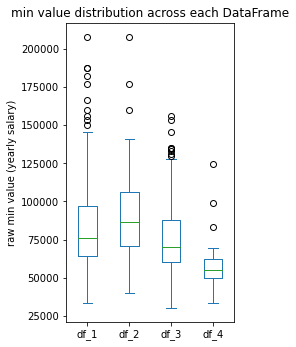

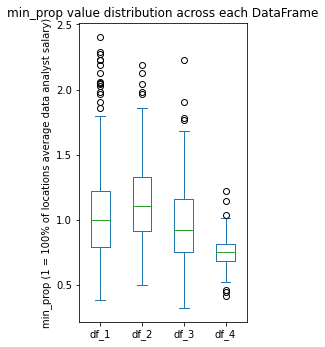

In [86]:
# create another boxplot to compare distributions visually
df_dict = {'df_1':df_1, 'df_2':df_2, 'df_3':df_3, 'df_4':df_4}
df_min_props = pd.DataFrame(columns = df_dict.keys())
df_mins = pd.DataFrame(columns = df_dict.keys())
for df in df_dict:
    df_min_props[df] = pd.Series(df_dict[df]['min_prop'].values)
    df_mins[df] = pd.Series(df_dict[df]['min'].values)
    
# min
boxplot = df_mins.plot(
    kind = 'box', 
    title = 'min value distribution across each DataFrame',
    figsize = (3,5.5)
)
boxplot.set_ylabel('raw min value (yearly salary)')
plt.show()

# min_prop
boxplot = df_min_props.plot(
    kind = 'box', 
    title = 'min_prop value distribution across each DataFrame',
    figsize = (3,5.5)
)
boxplot.set_ylabel('min_prop (1 = 100% of locations average data analyst salary)')
plt.show()    

Now that we've completed the refinement of each DataFrame, we'll make a decision on how to proceed with analysis now.

To recap the null hypothesis:
### $$ H_0: μ_{x1} - μ_{x2} \leq 0$$ 

μ represents the average starting pay, adjusted in relation to each location's average data analyst salary as a proportion, and x represents the groups of jobs posted on Indeed: group 1 where the job description mentions both Python and Tableau (notated as x1), and group 2 where the job description mentions Tableau, but not Python (notated as x2). 

The broadness of the research question and null hypothesis indicates that technically, df_1 would be the best fit for testing the null hypothesis, since it has the most varied data on data analyst job posts. However, we must also acknowledge the impact of Tiers and Experience levels on salaries, a factor which this notebook was only able to separate based on the scraped job titles. Additionally, we must also consider that this project's creation was triggered by Odacity's marketing team's need to motivate prospective students, a demographic which the junior & entry level jobs represented more in df_3 and df_4 would be more applicable to. Weighing all of this, we will provide the marketing team and other stakeholders with a conclusion more complex than just rejection or failure of rejection to the null hypothesis by incorporating all DataFrames, even if only df_1 is used to challenge the null hypothesis.

## Bootstrap Re-Sampling & Statistic Retrieval <a class="anchor" id="7"></a>

With our final dataframes established, we can perform bootstrap sampling to obtain the necessary statistics needed for simulating under the null hypothesis in the next section.

In [87]:
df_list = [df_1, df_2, df_3, df_4]

In [88]:
# Create our bootstrap function
def bootstrap(data, n_boot, column):
    '''
    Inputs:
        - data: a list of DataFrames whose specified column values will be sampled for bootstrapping
        - n_boot: the number of bootstrap samples to perform
        - column: the column whose values will be bootstrapped
    Outputs: 
        - a list with the re-sampled mean differences for each DataFrame in data nested within
    '''
    all_means_diff = []
    
    for i in range(len(data)):
        means_diff = []
        for n in range(n_boot):
            x = data[i][data[i]['python'] == 1][column].values #separate by presence of python
            sample = np.random.choice(x, size = len(x))
            mean_1 = np.mean(sample)
            
            x = data[i][data[i]['python'] == 0][column].values #separate by absence of python 
            sample = np.random.choice(x, size = len(x))
            mean_0 = np.mean(sample)
            
            mean_diff = mean_1 - mean_0
            means_diff.append(mean_diff)
            
        all_means_diff.append(means_diff)
        
    return all_means_diff

In [89]:
diff_dist = bootstrap(df_list, 1000, 'min_prop')
raw_diff_dist = bootstrap(df_list, 1000, 'min') # Won't be used for null hypothesis testing 
                                                # but will still provide insight for later

In [90]:
# record bootstrapped differences for min_prop
df_1_diffs = diff_dist[0]
df_2_diffs = diff_dist[1]
df_3_diffs = diff_dist[2]
df_4_diffs = diff_dist[3]

# repeat for min
df_1_raw_diffs = raw_diff_dist[0]
df_2_raw_diffs = raw_diff_dist[1]
df_3_raw_diffs = raw_diff_dist[2]
df_4_raw_diffs = raw_diff_dist[3]

Now that we've bootstrapped our samples to produce normal distributions, we can simulate the null for each.  Using the standard deviations of our bootstrapped sample distributions, we can create normal distributions that simulate our null hypothesis. The observed difference in min_prop means between our groups in each dataframe will be plotted on these null hypothesis distributions for analysis.

In [91]:
# Simulate the null using the distributions of each re-sampled distribution
# min_prop
df_1_nullh_vals = np.random.normal(0, np.std(df_1_diffs),1000)
df_2_nullh_vals = np.random.normal(0, np.std(df_2_diffs),1000)
df_3_nullh_vals = np.random.normal(0, np.std(df_3_diffs),1000)
df_4_nullh_vals = np.random.normal(0, np.std(df_4_diffs),1000)

# min
df_1_raw_nullh_vals = np.random.normal(0, np.std(df_1_raw_diffs),1000)
df_2_raw_nullh_vals = np.random.normal(0, np.std(df_2_raw_diffs),1000)
df_3_raw_nullh_vals = np.random.normal(0, np.std(df_3_raw_diffs),1000)
df_4_raw_nullh_vals = np.random.normal(0, np.std(df_4_raw_diffs),1000)

With the null simulated for each DataFrame, we can proceed to the Analysis section.

## Analysis <a class="anchor" id="8"></a>

This section well test the null hypothesis using df_1 for an official answer to the question presented by the marketing team, but will also test the null hypothesis using df_2, df_3, and df_4 to grant us more insight on how separating out jobs based on job title impacts the observed statistic and simulated null distribution.

The null hypothesis will be tested by plotting the observed difference in min_prop means amongst the DataFrame along the simulated null distribution in order to calculate the p-value, which represents the likelihood that we would have observed this statistic in our sample given that the null hypothesis holds true for the population.  A low p-value (below 0.05) suggests that the likelihood of producing the result in a sample taken from the population is so low under the null hypothesis that we reject it in favor of the alternative hypothesis.  This does not confirm nor deny the hypothesis being true for the population, and is simply an educated estimation.

In [92]:
#Create a function for selecting the color the p-value region of the histogram will be shaded
def pval_color(pval):  
    '''
    Inputs: 
        - p-value (as a decimal)
    Outputs: 
        - Returns a tuple of red, green, blue values
    '''
    if pval <= 0.05:
        r = 0
        g = 1
        b = 0
    else:
        r = 1
        g = 1 - pval #lower pval results in more yellow
        b = 0
    rgb = [(r, g, b, 1)]
    return rgb

In [93]:
# Create a function for testing against the null by plotting and printing the p-value
def nullh_test(nullh_vals, dataframe, column, label_offset_h, label_offset_v): 
    '''
    Inputs: 
        - The values of the simulated null distribution  
        - The dataframe whose observed statistic is to be be plotted 
        - The column whose mean (the observed statistic) is to be plotted
        - Horizontal offset value for the plotted observed statistic label (aesthetical)
        - Vertical offset value for the plotted observed statistic label (aesthetical)
    Outputs: 
        - The observed statistic plotted on the simulated null's histogram, with the region representing the p-value
        shaded a gradient of red/yellow or green depending on if it's statistically significant for rejecting the null, 
        becoming more yellow the closer it is to being statistically significant. 
    '''
    # Plot the simulated null distribution and the observed difference
    ax = plt.hist(nullh_vals, alpha = 0.75, zorder=1)
    obs_diff = dataframe[dataframe['python'] == 1][column].mean() - \
        dataframe[dataframe['python'] == 0][column].mean()
    obs_line = plt.axvline(x=obs_diff, color='r')
    plt.text(obs_diff+label_offset_h,label_offset_v,'Observed Difference',rotation=90)
    plt.ylabel('Count')
    plt.xlabel('μ1 - μ2')
    
    # Calculate and print the p-value along with the observed statistic
    p_value = 0 
    for val in nullh_vals:
        if val > obs_diff:
            p_value += 1
    p_value = p_value/len(nullh_vals)
    color = pval_color(p_value)
    print(f'Observed difference: {round(obs_diff,3)}')
    print(f'P-value for observed difference: {p_value}')
    print(f'Cutoff for p-value of 0.05: {round(np.percentile(nullh_vals, 95), 3)}')
    
    # Shade to the right of the p-value for visualization
    hist, bins = np.histogram(nullh_vals)
    p_value_x = bins[-3]
    p_value_y = max(hist)
    obs_diff_x = bins[0]
    obs_diff_y = max(hist)
    bins = np.repeat(bins, 2)
    i = 0
    for edge in bins: 
        if edge < obs_diff:
            i += 1
    bins = np.delete(bins, range(0, i, 1), axis=0)
    bins = np.insert(bins, 0, [obs_diff, obs_diff], axis = 0)
    hist = np.hstack((0, np.repeat(hist, 2), 0))
    hist = np.delete(hist, range(0, i-2, 1), axis=0)
    fill = (obs_diff<=bins)&(bins<=max(bins))
    plt.fill_between(bins[fill], hist[fill], 0, color=color, edgecolor = 'k', hatch='/', zorder=2)
    plt.text(p_value_x, p_value_y, f'P-value: {p_value}')

Observed difference: -0.037
P-value for observed difference: 0.889
Cutoff for p-value of 0.05: 0.053


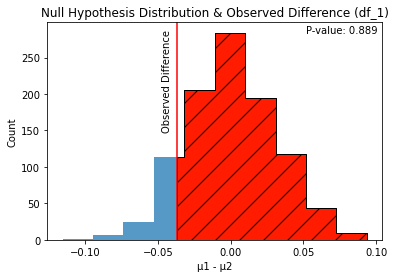

In [94]:
nullh_test(df_1_nullh_vals, df_1, 'min_prop', -0.01, 150)
plt.title('Null Hypothesis Distribution & Observed Difference (df_1)')
plt.show()

Not only is our observed statistic below 0, but our p-value is nearly 0.9, well above the 0.05 threshold for failing to reject the null hypothesis. However, this interpretation of the p-value results from our desire to avoid a type I error:
* Type I error: the null hypothesis is rejected when it's true in the population
* Type II error: the null hypothesis is not rejected, but the alternative is true in the population

A p-value of 0.889 means that had the null hypothesis been reversed in its direction, we would still have failed to reject the null, since the resulting p-value of 0.111 is still above the threshold of 0.05. This means that although we fail to reject our null hypothesis in favor of the alternative, it's important to note that a null hypothesis suggesting that jobs without mention of Python paying more than those that do would have also been rejected under this interpretation.

We'll see below how the other DataFrames hold up against the null hypothesis:

Observed difference: -0.026
P-value for observed difference: 0.716
Cutoff for p-value of 0.05: 0.081


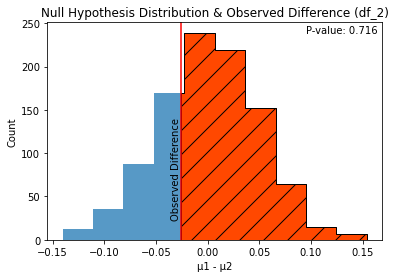

In [95]:
nullh_test(df_2_nullh_vals, df_2, 'min_prop', -0.01, 25)
plt.title('Null Hypothesis Distribution & Observed Difference (df_2)')
plt.show()

Observed difference: -0.022
P-value for observed difference: 0.734
Cutoff for p-value of 0.05: 0.052


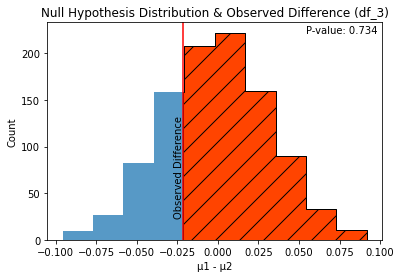

In [96]:
nullh_test(df_3_nullh_vals, df_3, 'min_prop', -0.005, 25)
plt.title('Null Hypothesis Distribution & Observed Difference (df_3)')
plt.show()

Observed difference: 0.117
P-value for observed difference: 0.085
Cutoff for p-value of 0.05: 0.141


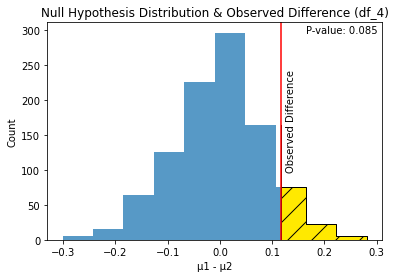

In [97]:
nullh_test(df_4_nullh_vals, df_4, 'min_prop', 0.01, 100)
plt.title('Null Hypothesis Distribution & Observed Difference (df_4)')
plt.show()

All other DataFrames had more promising p-values, with df_4 coming the closest to providing a p-value that allows us to adequately reject the null hypothesis with the intention to avoid a type I error. Although it still was not low enough to reject the null, it's proximity to the threshold in comparison to the p-values of the other DataFrame tests suggests that with a more focused, refined DataFrame focused on only entry level/junior/lower tier data analyst positions could produce a p-value low enough to reject the null hypothesis.

We can repeat the hypothesis testing for the raw minimum salaries as well:

Observed difference: 1976.998
P-value for observed difference: 0.207
Cutoff for p-value of 0.05: 3867.48


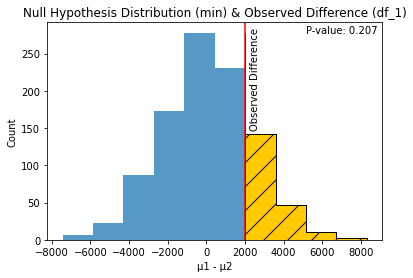

In [98]:
nullh_test(df_1_raw_nullh_vals, df_1, 'min', 300, 150)
plt.title('Null Hypothesis Distribution (min) & Observed Difference (df_1)')
plt.show()

Observed difference: 3672.526
P-value for observed difference: 0.181
Cutoff for p-value of 0.05: 6350.368


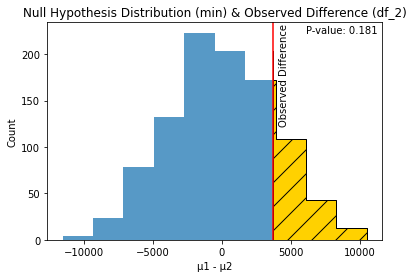

In [99]:
nullh_test(df_2_raw_nullh_vals, df_2, 'min', 500, 125)
plt.title('Null Hypothesis Distribution (min) & Observed Difference (df_2)')
plt.show()

Observed difference: 2538.852
P-value for observed difference: 0.143
Cutoff for p-value of 0.05: 3964.947


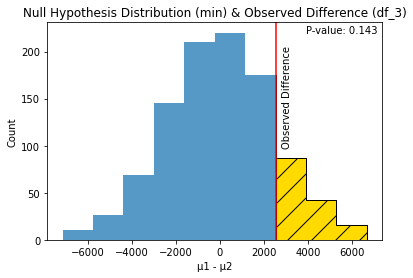

In [100]:
nullh_test(df_3_raw_nullh_vals, df_3, 'min', 300, 100)
plt.title('Null Hypothesis Distribution (min) & Observed Difference (df_3)')
plt.show()

Observed difference: 13333.423
P-value for observed difference: 0.046
Cutoff for p-value of 0.05: 13002.324


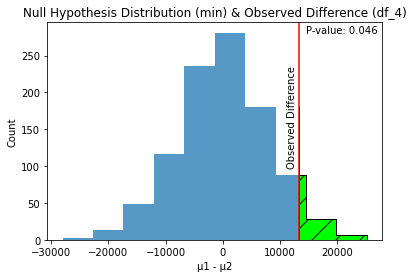

In [101]:
nullh_test(df_4_raw_nullh_vals, df_4, 'min', -2000, 100)
plt.title('Null Hypothesis Distribution (min) & Observed Difference (df_4)')
plt.show()

Had our null hypothesis addressed raw minimum salaries rather than salaries in relation to the job location's average data analyst salary, and our dataframes refined in the same manner, we actually would have been able to (barely) reject the null hypothesis with a p-value of 0.046 when using the jobs from df_4.  

We may have tackled the null hypothesis using different DataFrames, but we can still provide additional valuable information to our marketing team from insights gained through further examination.  We'll be repeating some of the wrangling process below, but with more focus on the following aspects of the data, which can contribute to the key takeaways we report in our conclusion:

* Commonality of Python being mentioned
    * How many rows mentioned Python at all? How about Tableau?
    * Of the rows that mention Tableau, how many mentioned Python? 
* Python's impact on pay when jobs don't necessarily also mention Tableau
    * How do minimum salaries compare between jobs that mention Python and those that don't?
    * How does adjusted (min_prop) pay compare between jobs that mention Python and those that don't?


We won't be applying statistical significance to these questions since they're not the focus of the project, but taking these aspects of the data into account provides us with the opportunity to provide advice to the marketing team beyond a simple response to the null hypothesis.

In [102]:
# Reload our dataframe to answer the questions presented above
df = pd.read_csv('Indeed_Job_Scrape_Raw_02-09-2023_07-18-00.csv')

# We won't be refining the dataset as much as we did for hypothesis testing, but we still want to get rid of duplicates.
df = df.drop_duplicates(subset = df.columns.difference(['Location'])) 

In [103]:
# How many (non-duplicate) rows mention Python/Tableau?
python_percent = df['Mentions python'].mean()
tableau_percent = df['Mentions tableau'].mean()

print(f'Percent of scraped jobs flagged for Python: {python_percent*100}% \n\
Percent of scraped jobs flagged for Tableau: {tableau_percent*100}%' )

Percent of scraped jobs flagged for Python: 18.608119304059652% 
Percent of scraped jobs flagged for Tableau: 22.485501242750622%


In [104]:
# If a job in the dataset already mentions Tableau in the description, what're the chances it'll also mention Python?
df_tableau = df[df['Mentions tableau'] == 1]
python_percent = df_tableau['Mentions python'].mean()

print(f'Percent of jobs that already mention Tableau also mentioning Python: {python_percent*100}%')

Percent of jobs that already mention Tableau also mentioning Python: 43.69933677229182%


In [105]:
# How do minimum salaries compare between jobs that mention Python and those that don't?
# Repeat the wrangling steps needed for valid, converted salary ranges
df = df[(df['Pay Min'] > 0) & (df['Avg Salary'] > 0)]
df.loc[df['Pay Type'] == 'hourly', ['Pay Min']] = (df['Pay Min'] * 2080)
df.loc[df['Pay Type'] == 'monthly', ['Pay Min']] = (df['Pay Min'] * 12)

print(f"Average minimum salary of jobs that mention Python: {df[df['Mentions python'] == 1]['Pay Min'].mean()} \n\
Average minimum salary of jobs that don\'t mention Python: {df[df['Mentions python'] == 0]['Pay Min'].mean()}")

Average minimum salary of jobs that mention Python: 85011.24857142854 
Average minimum salary of jobs that don't mention Python: 79527.43218142548


In [106]:
# How does adjusted (min_prop) pay compare between jobs that mention Python and those that don't?
# Calculate and add the min_prop column again
df['min_prop'] = df['Pay Min']/df['Avg Salary']

print(f"Average min_prop of jobs that mention Python: {df[df['Mentions python'] == 1]['min_prop'].mean()} \n\
Average min_prop of jobs that don\'t mention Python: {df[df['Mentions python'] == 0]['min_prop'].mean()}")

Average min_prop of jobs that mention Python: 1.0626960948190782 
Average min_prop of jobs that don't mention Python: 1.039760032456259


## Conclusion <a class="anchor" id="9"></a>

The answer to the research question may not have been the one that Odacity's marketing team was hoping for, but we were able to successfully apply statistical significance to the observed statistic from our sample and conclude with a failure to reject the null hypothesis.  We may have failed to reject the null hypothesis using our most refined DataFrame, but we were able to measure more favorable p-values from the other DataFrames.  Additionally, under a similar but different theoretical null hypothesis (one without concern for location averages), the distribution and observed statistic of df_4 was able to produce a p-value that would have rejected the null hypothesis, albeit barely.  

We advise the marketing team at Odacity that if they wish to promote their Python course to the Tableau course graduates, claiming that data analyst positions on Indeed pay more on average when their job description mentions both Tableau and Python as opposed to just Tableau is inaccurate and unsubstantiated. However, we also advise that should they wish to put forth a new research question in relation to Python and Tableau's relationship to data analyst salaries, to focus on the raw minimum salaries of entry-level positions rather than the adjusted proportionate salaries of broader positions. They could also find success in further research or experiments that explore the statistics behind the desirability of Python skills at data analyst positions.  For example, the sample dataset had nearly 20% of data analyst jobs mentioning Python somewhere in their job description, and of those that mention Tableau, over 40% also mention Python. On top of that, there was a positive observed difference between both the raw min and proportionate min_prop of jobs that mentioned Python and jobs that didn't. Although the DataFrames where these statistics were observed was not refined as much as the ones used for this project's null hypothesis, they are promising in terms of potential.

We may have failed to reject the null hypothesis, but these latest statistics on our sampled dataset can be used to suggest a new research question for the organization and its marketing team to pursue an answer to, a question that is more focused on entry-level data analyst positions and possibly also on raw starting salaries without concern for location averages.